## Feature Type Experiments

### Imports

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from imports import *

In [2]:
from models import *
from data import * 
from env import *
from harmonize import *
from sim import *
from sim import sim_run
from sim import plot

In [3]:
# overall imports
import importlib
import data

# data load
from data.data_load import load_transcriptome, load_connectome, load_coords
from data.data_viz import plot_connectome, plot_connectome_with_labels, plot_transcriptome
importlib.reload(data.data_load)
importlib.reload(data.data_viz)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# prebuilt model classes
import models.base_models
from models.base_models import ModelBuild
importlib.reload(models.base_models)

# metric classes
import models.metrics.distance_FC
import models.metrics.eval
from models.metrics.eval import ModelEvaluator
from models.metrics.eval import pearson_numpy, mse_numpy, r2_numpy, pearson_cupy, mse_cupy, r2_cupy
importlib.reload(models.metrics.eval)


# sim class
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
import sim.sim_run
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results
importlib.reload(sim.sim)
importlib.reload(sim.sim_utils)
importlib.reload(sim.sim_run)

# sim class
import sim.sim 
from sim.sim import Simulation
importlib.reload(sim.sim)


<module 'sim.sim' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim.py'>

In [4]:

total = psutil.disk_usage('/').total
print(bytes2human(total))

GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.showUtilization()


52.4G
GPU found 0
XGBoost version: 2.0.3
cupy version: 13.1.0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [5]:
torch.cuda.is_available()

True

In [6]:
print(torch.__file__)
print(torch.__version__)

# How many GPUs are there?
print(torch.cuda.device_count())


# Get the name of the current GPU
print(torch.cuda.get_device_name(torch.cuda.current_device()))

# Is PyTorch using a GPU?
print(torch.cuda.is_available())

/ext3/miniconda3/lib/python3.11/site-packages/torch/__init__.py
2.4.1+cu121
1
Tesla V100-SXM2-32GB
True


[Sims](#sims)

### Predict structural connectome from transcriptome

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(7140, 22106) (7140,) (812, 22106) (812,)
2
3
4
ACCELERATING
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-1.126, test=-10.584) total time=   3.1s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-1.150, test=-11.190) total time=   1.9s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-1.009, test=-12.853) total time=   1.9s
[CV 1/

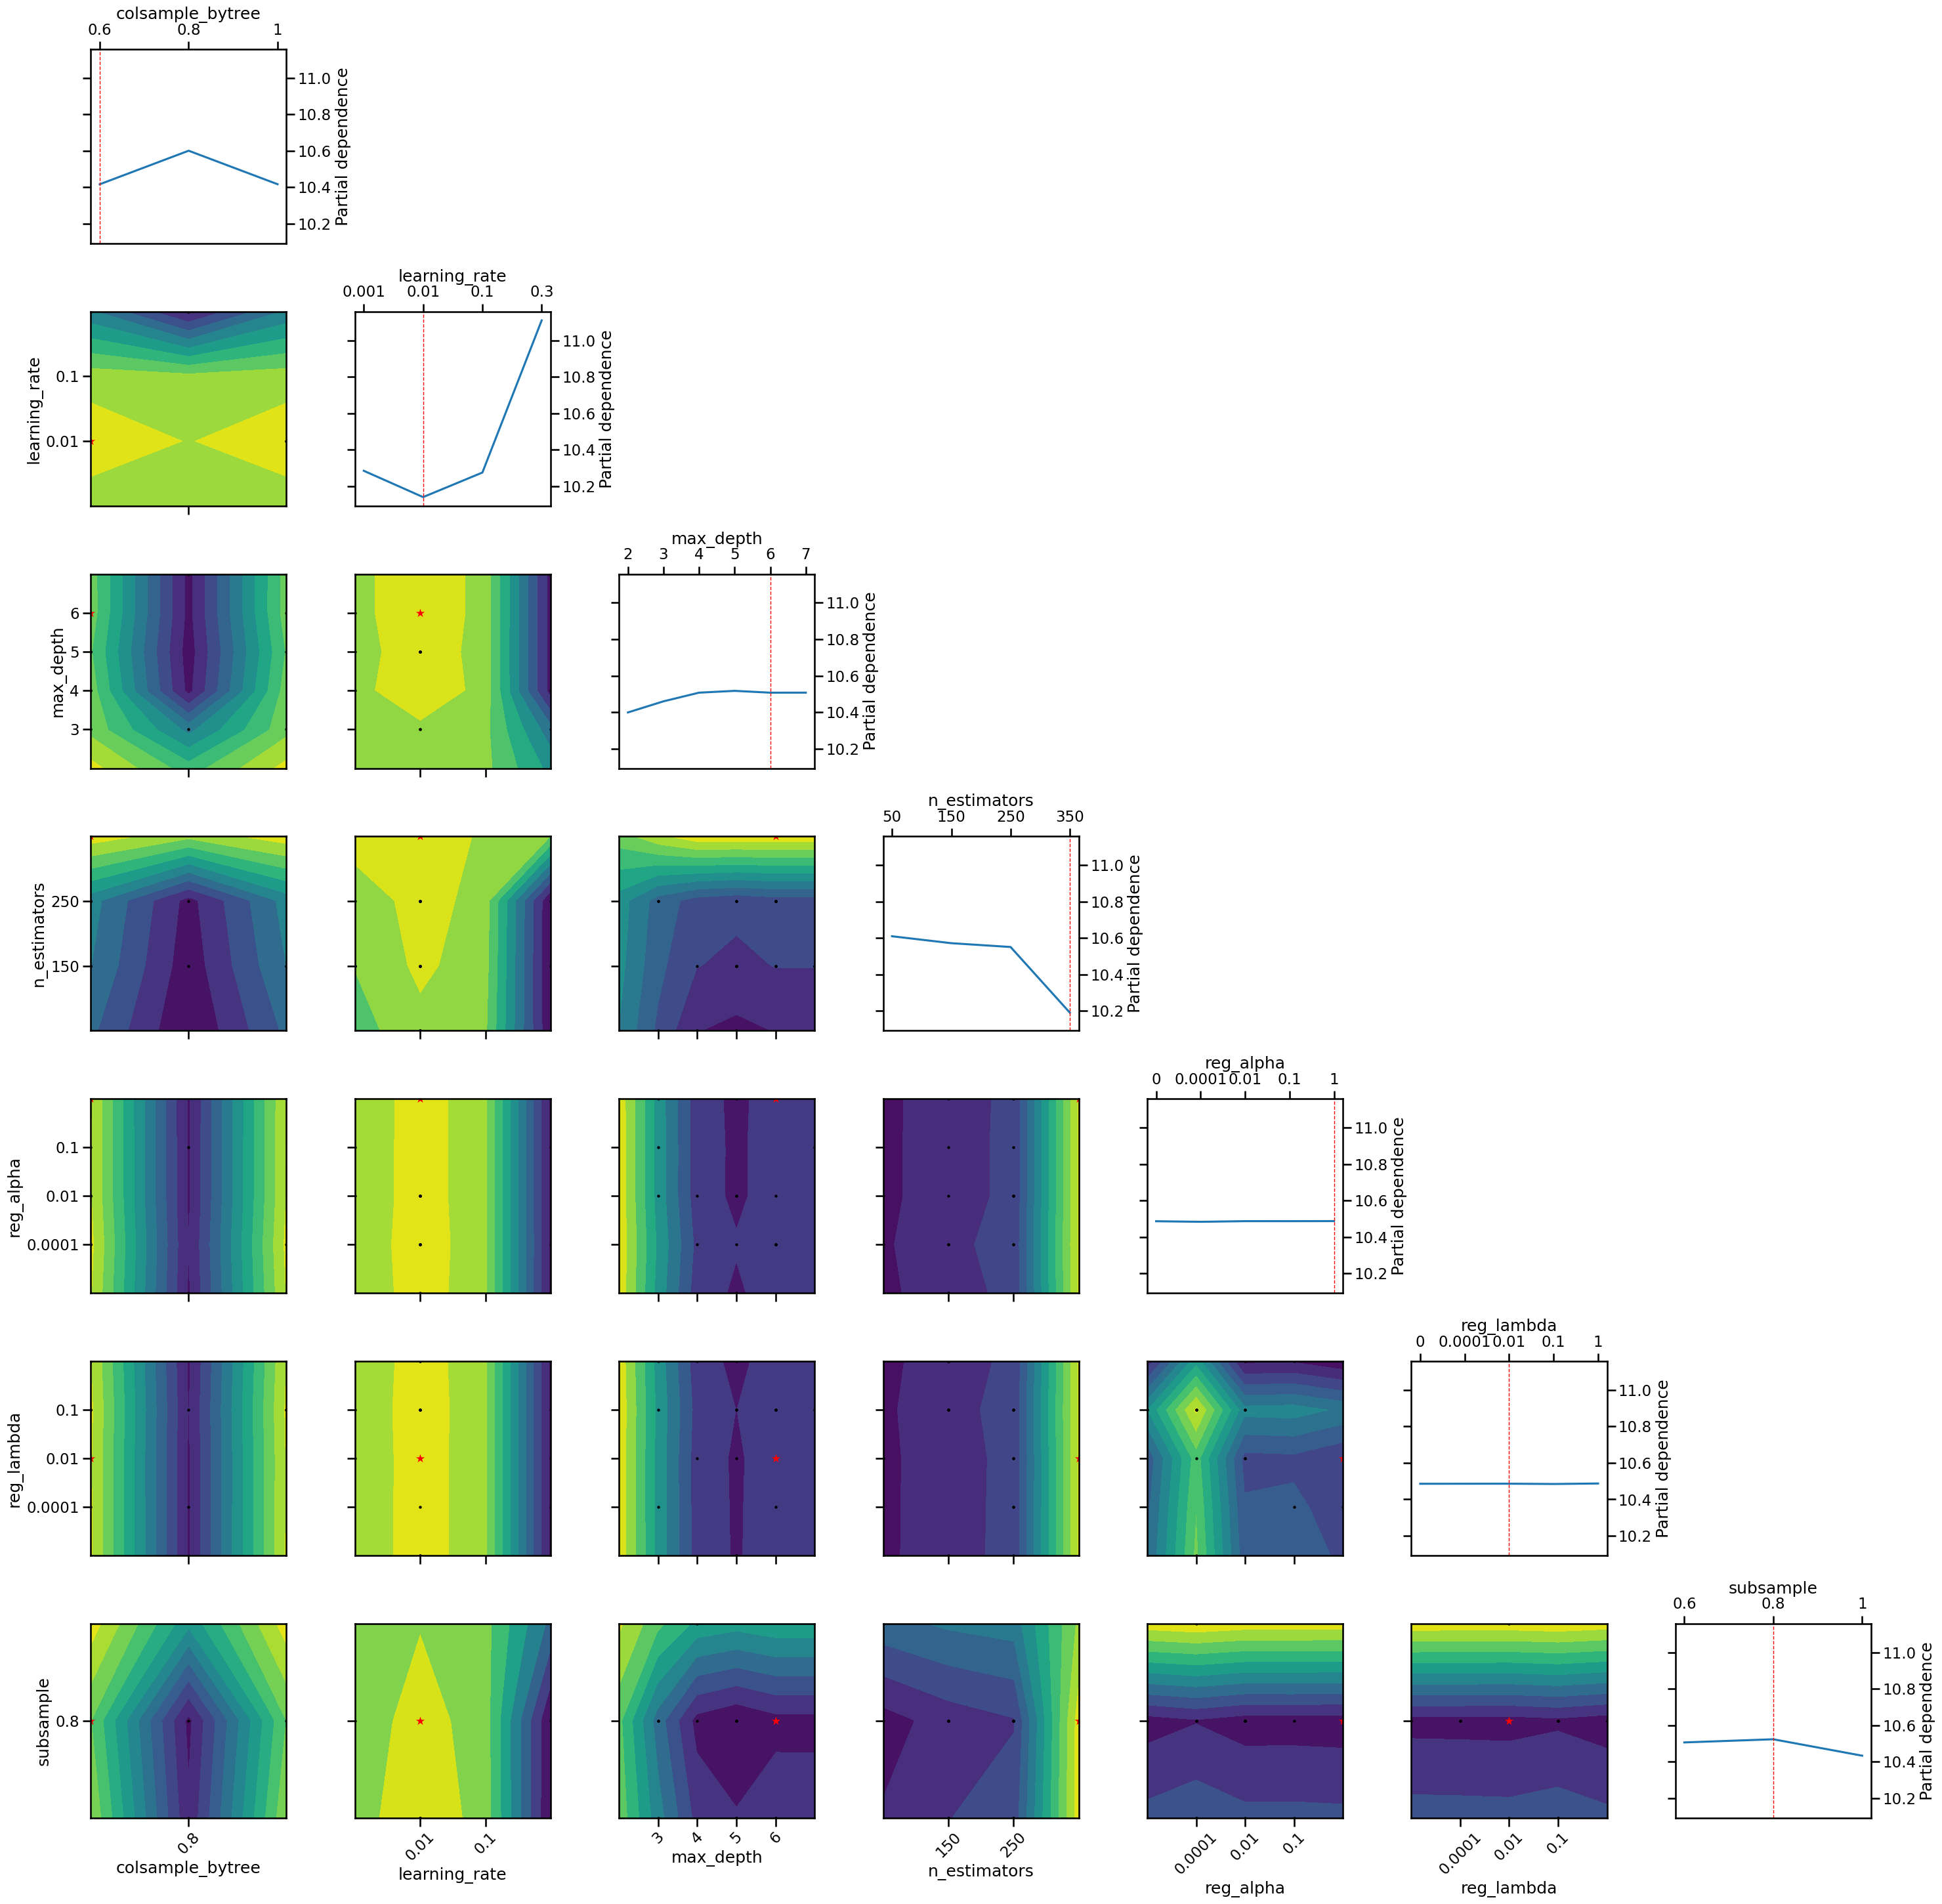


Train Metrics: {'mse': 4.337820380932805, 'mae': 1.5780021606347214, 'r2': 0.5382385504886588, 'pearson_corr': 0.8312950938261008, 'connectome_corr': 0.8528153969537902, 'connectome_r2': 0.5365269265311923, 'geodesic_distance': 14.268452064256829}
Test Metrics: {'mse': 7.841568367941854, 'mae': 2.2847767784317097, 'r2': 0.02398513002150062, 'pearson_corr': 0.40399118130242345, 'connectome_corr': 0.3047834156121411, 'connectome_r2': 0.013460835549889071, 'geodesic_distance': 9.414078692774739}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_

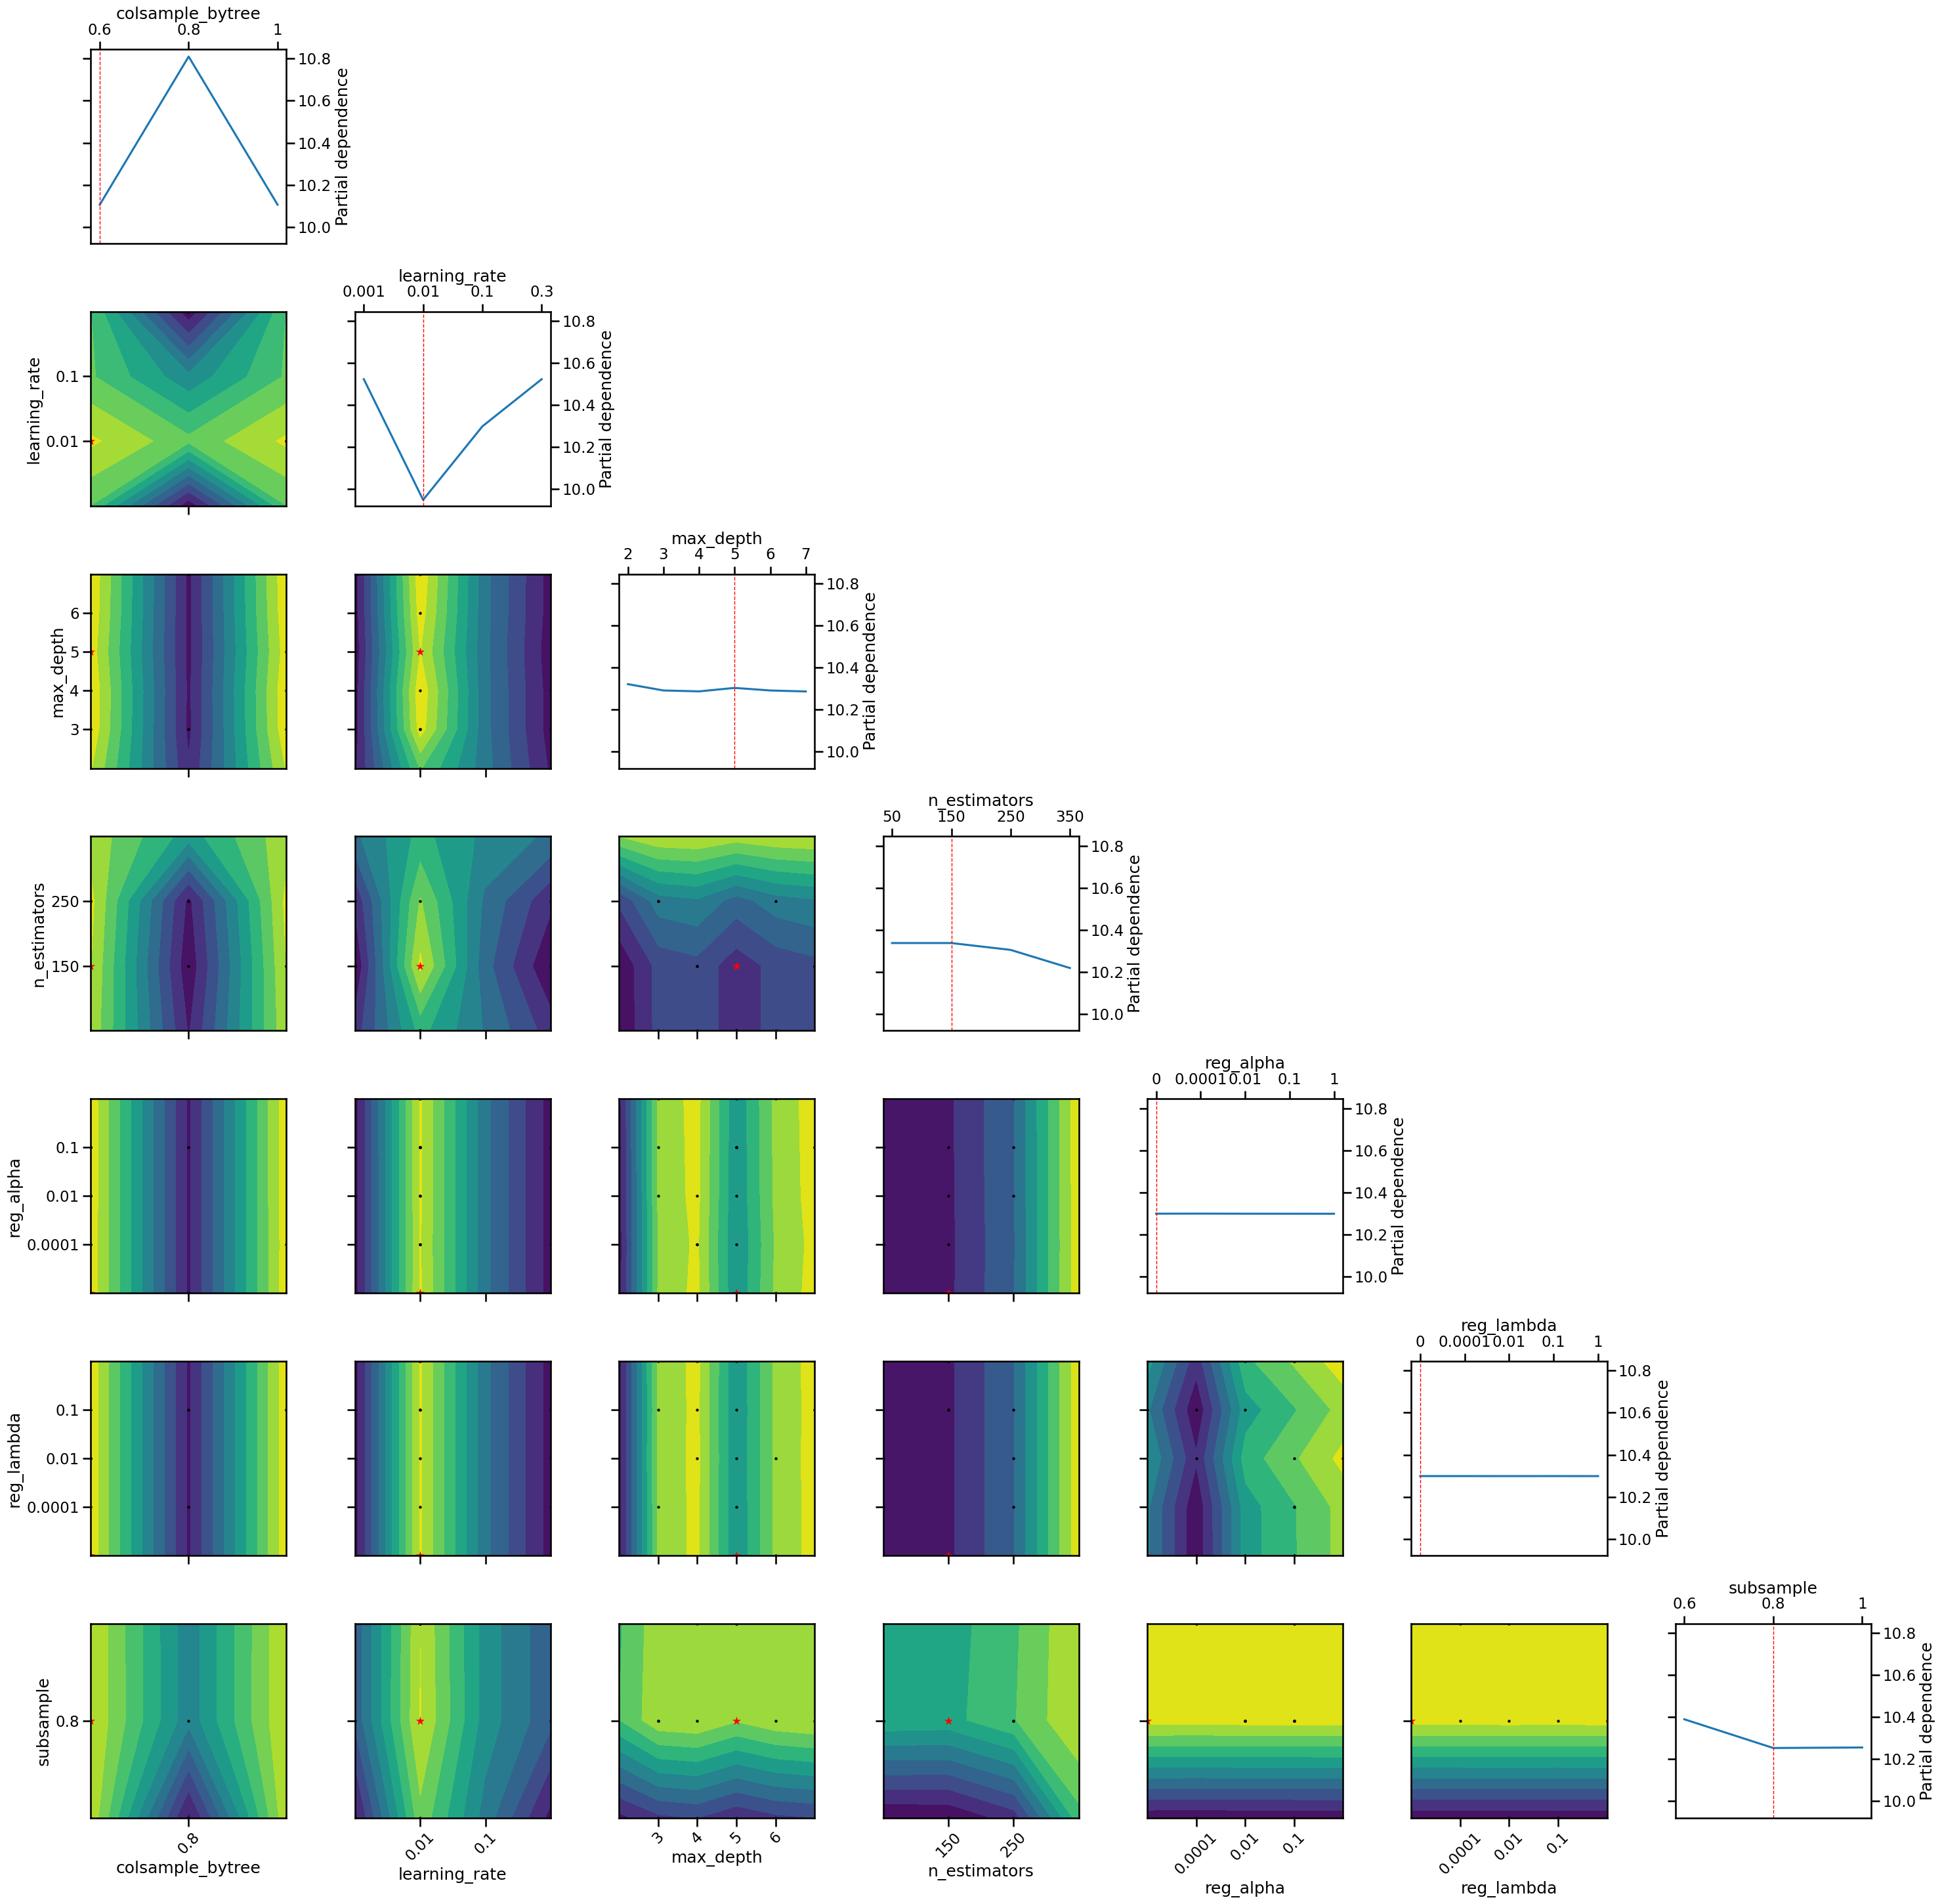


Train Metrics: {'mse': 7.579245867498741, 'mae': 2.2102378242330714, 'r2': 0.20842949659839455, 'pearson_corr': 0.6028651410993483, 'connectome_corr': 0.5622695465888873, 'connectome_r2': 0.20520439101480253, 'geodesic_distance': 19.67265794338158}
Test Metrics: {'mse': 8.036772476391398, 'mae': 2.3040008377326484, 'r2': -0.0764745072310638, 'pearson_corr': 0.219159899473691, 'connectome_corr': 0.16829966653105843, 'connectome_r2': -0.08571798055798084, 'geodesic_distance': 10.13964408706227}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_

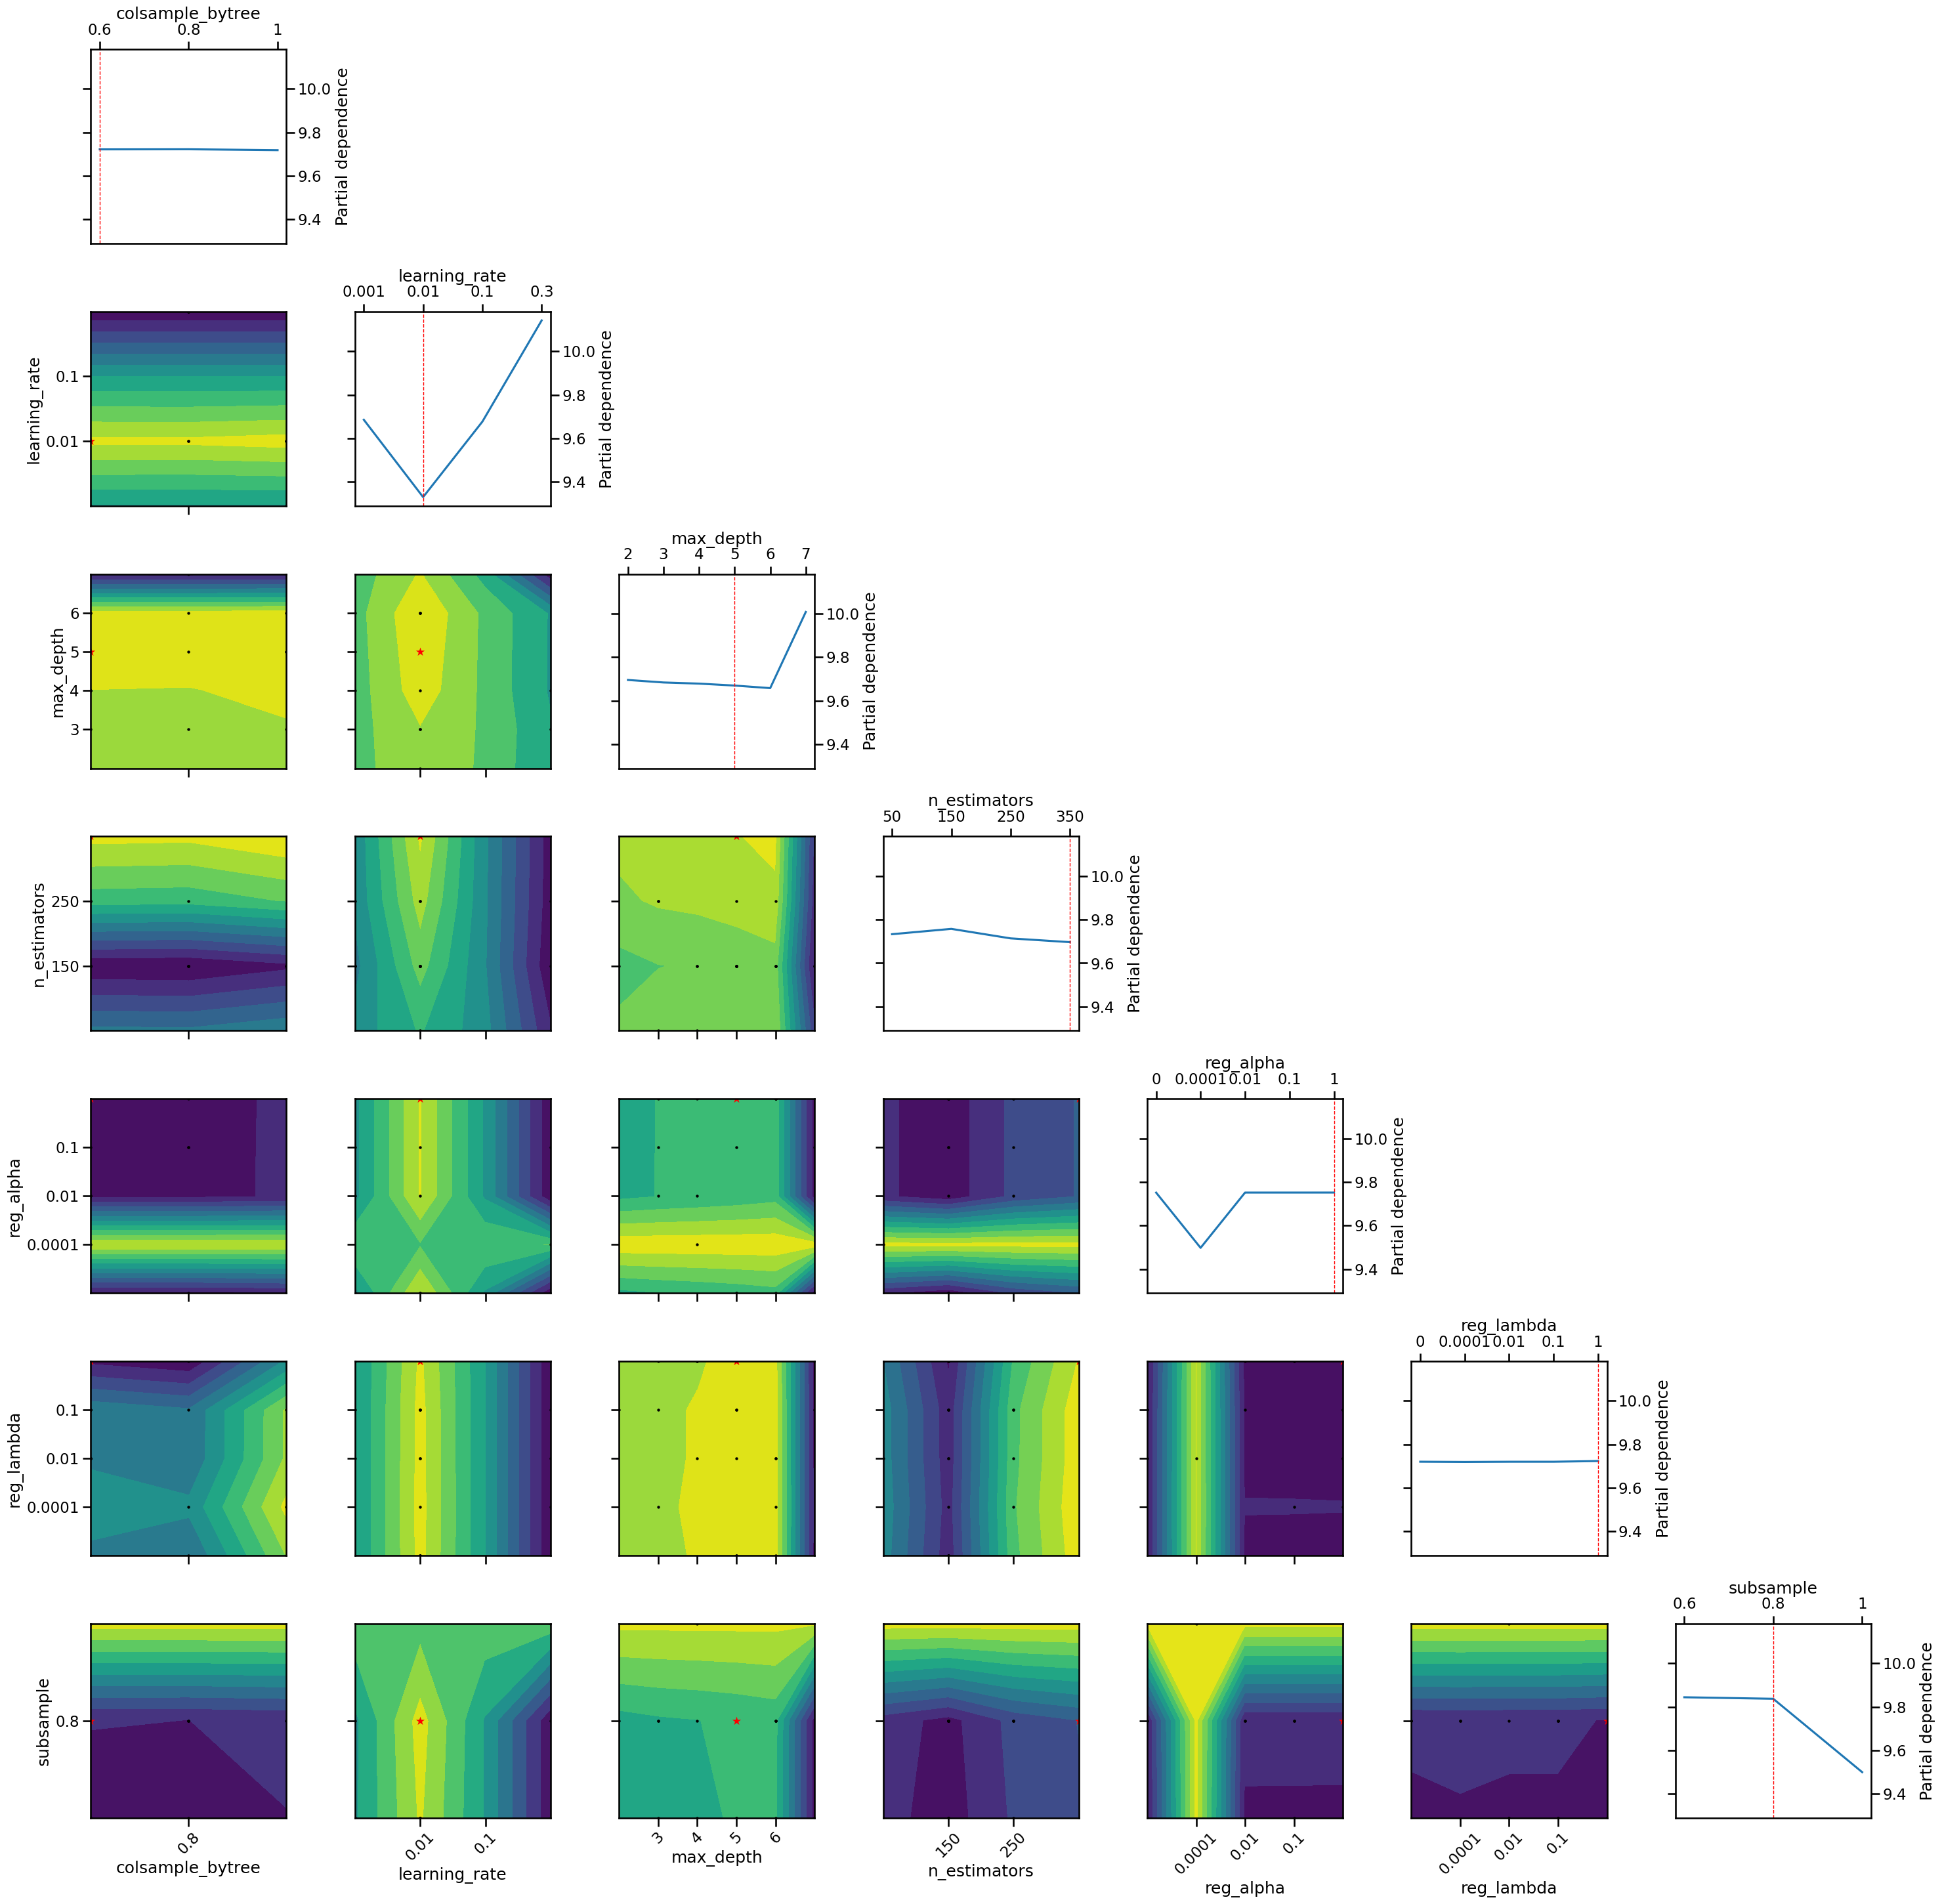


Train Metrics: {'mse': 5.532474451074029, 'mae': 1.7912012837515758, 'r2': 0.40112200460483244, 'pearson_corr': 0.7360507291401222, 'connectome_corr': 0.7545738091852057, 'connectome_r2': 0.39886120761712124, 'geodesic_distance': 16.266758297183788}
Test Metrics: {'mse': 8.637382151653268, 'mae': 2.3029952043360593, 'r2': 0.019190104399728014, 'pearson_corr': 0.3454028615188961, 'connectome_corr': 0.30361399825131413, 'connectome_r2': 0.009219600771207133, 'geodesic_distance': 9.604704959676678}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'm

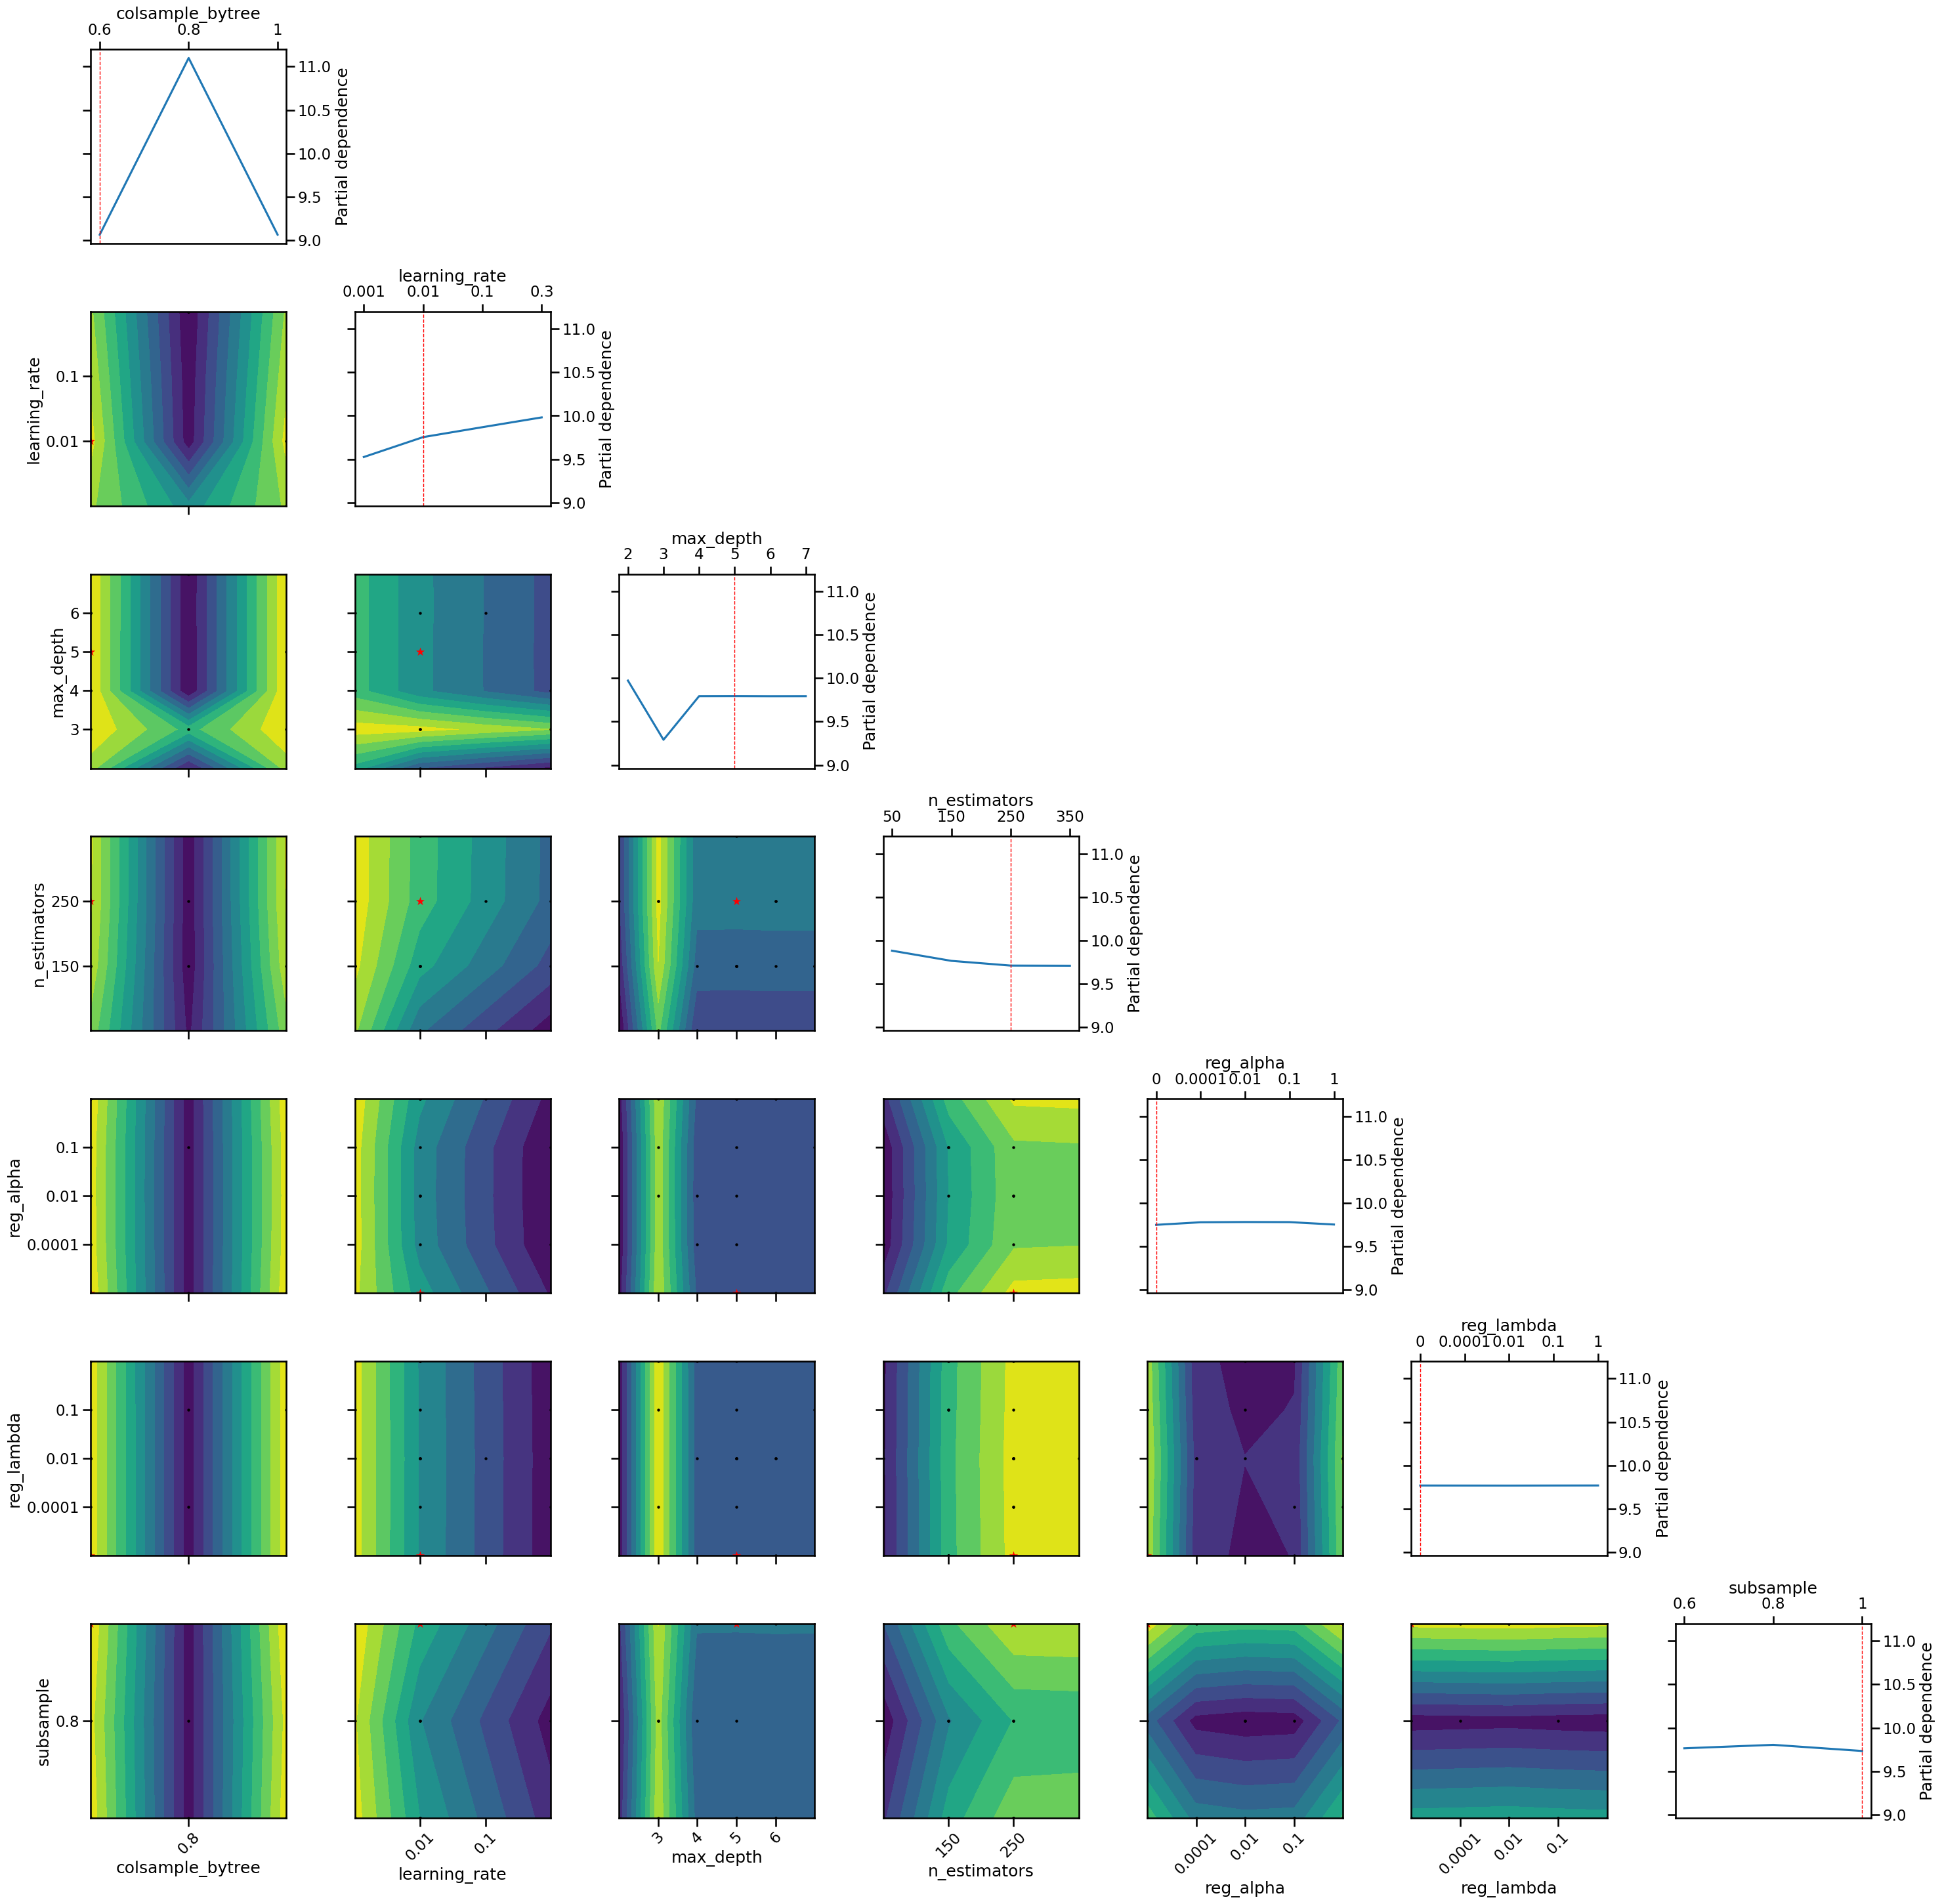


Train Metrics: {'mse': 6.248172308916558, 'mae': 1.9274230645155148, 'r2': 0.3077735954165703, 'pearson_corr': 0.6794576314579972, 'connectome_corr': 0.6911945397500171, 'connectome_r2': 0.30547578680580784, 'geodesic_distance': 18.43761003666477}
Test Metrics: {'mse': 9.912540489919847, 'mae': 2.456564483542224, 'r2': 0.04600452338501636, 'pearson_corr': 0.43965854429550066, 'connectome_corr': 0.3352854846285718, 'connectome_r2': 0.028752432912638317, 'geodesic_distance': 9.358573560744198}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_d

In [7]:
trans_to_struct_xgboost_sim_results = single_sim_run(
                                cv_type='random',
                                model_type='xgboost',
                                feature_type=['transcriptome'],
                                connectome_target='SC',
                                use_gpu=True,
                                use_shared_regions=False,
                                test_shared_regions=False,
                                save_sim=True,
                                resolution=1.01,
                                random_seed=42,
                                search_method=('bayes', 'mse')
                                )

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(6320, 22106) (6320,) (1122, 22106) (1122,)
2
3
ACCELERATING
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.532, test=-12.904) total time=   1.4s
[CV 2/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.237, test=-13.814) total time=   1.0s
[CV 1/2] END colsample_bytree=0.6, device=cuda, learning_rate=0.001, max_depth=6, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=1, reg_lambda=0.01, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=(train=-10.707, test=-11.493) total time=   3.1s
[CV 2/2

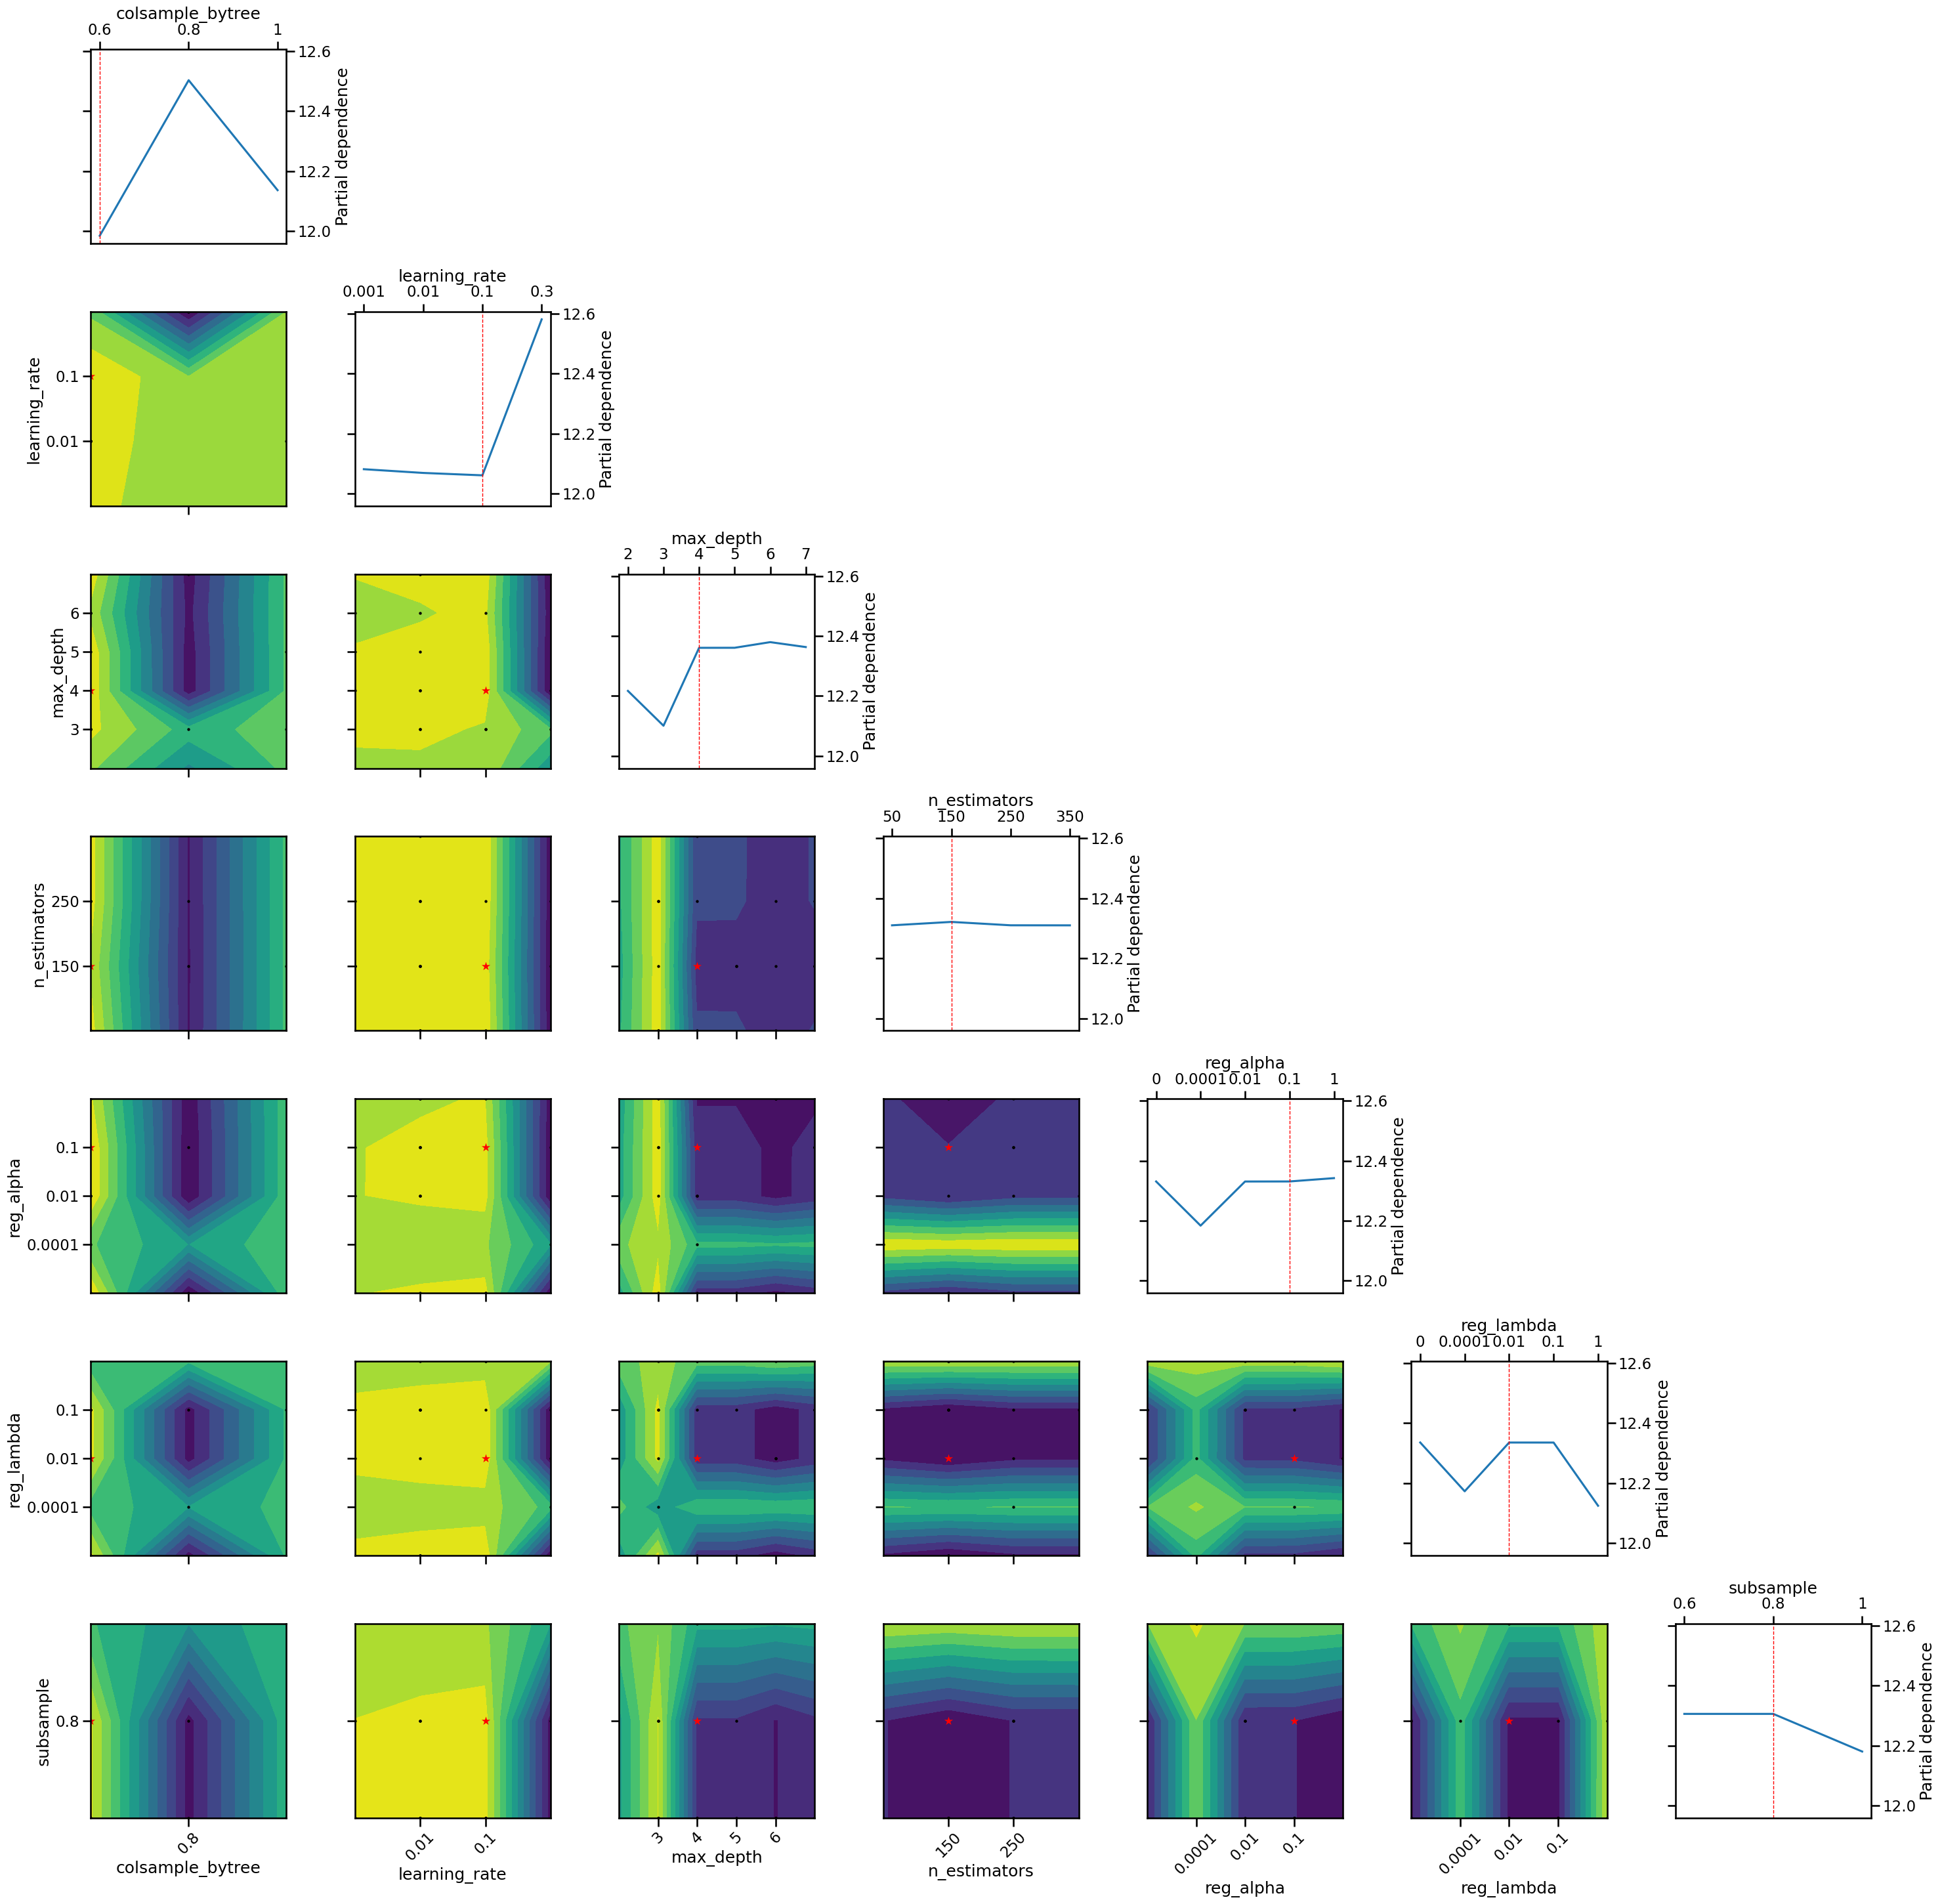


Train Metrics: {'mse': 3.7020479585494344, 'mae': 1.4824235282279432, 'r2': 0.6477112482564226, 'pearson_corr': 0.8561988007469321, 'connectome_corr': 0.852143504454492, 'connectome_r2': 0.6457021601230363, 'geodesic_distance': 12.68170753325088}
Test Metrics: {'mse': 11.04023963802535, 'mae': 2.806667539287026, 'r2': 0.0139899331823041, 'pearson_corr': 0.30707474139291846, 'connectome_corr': 0.2449651538485743, 'connectome_r2': 0.004817240179770473, 'geodesic_distance': 11.557213348700007}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_del

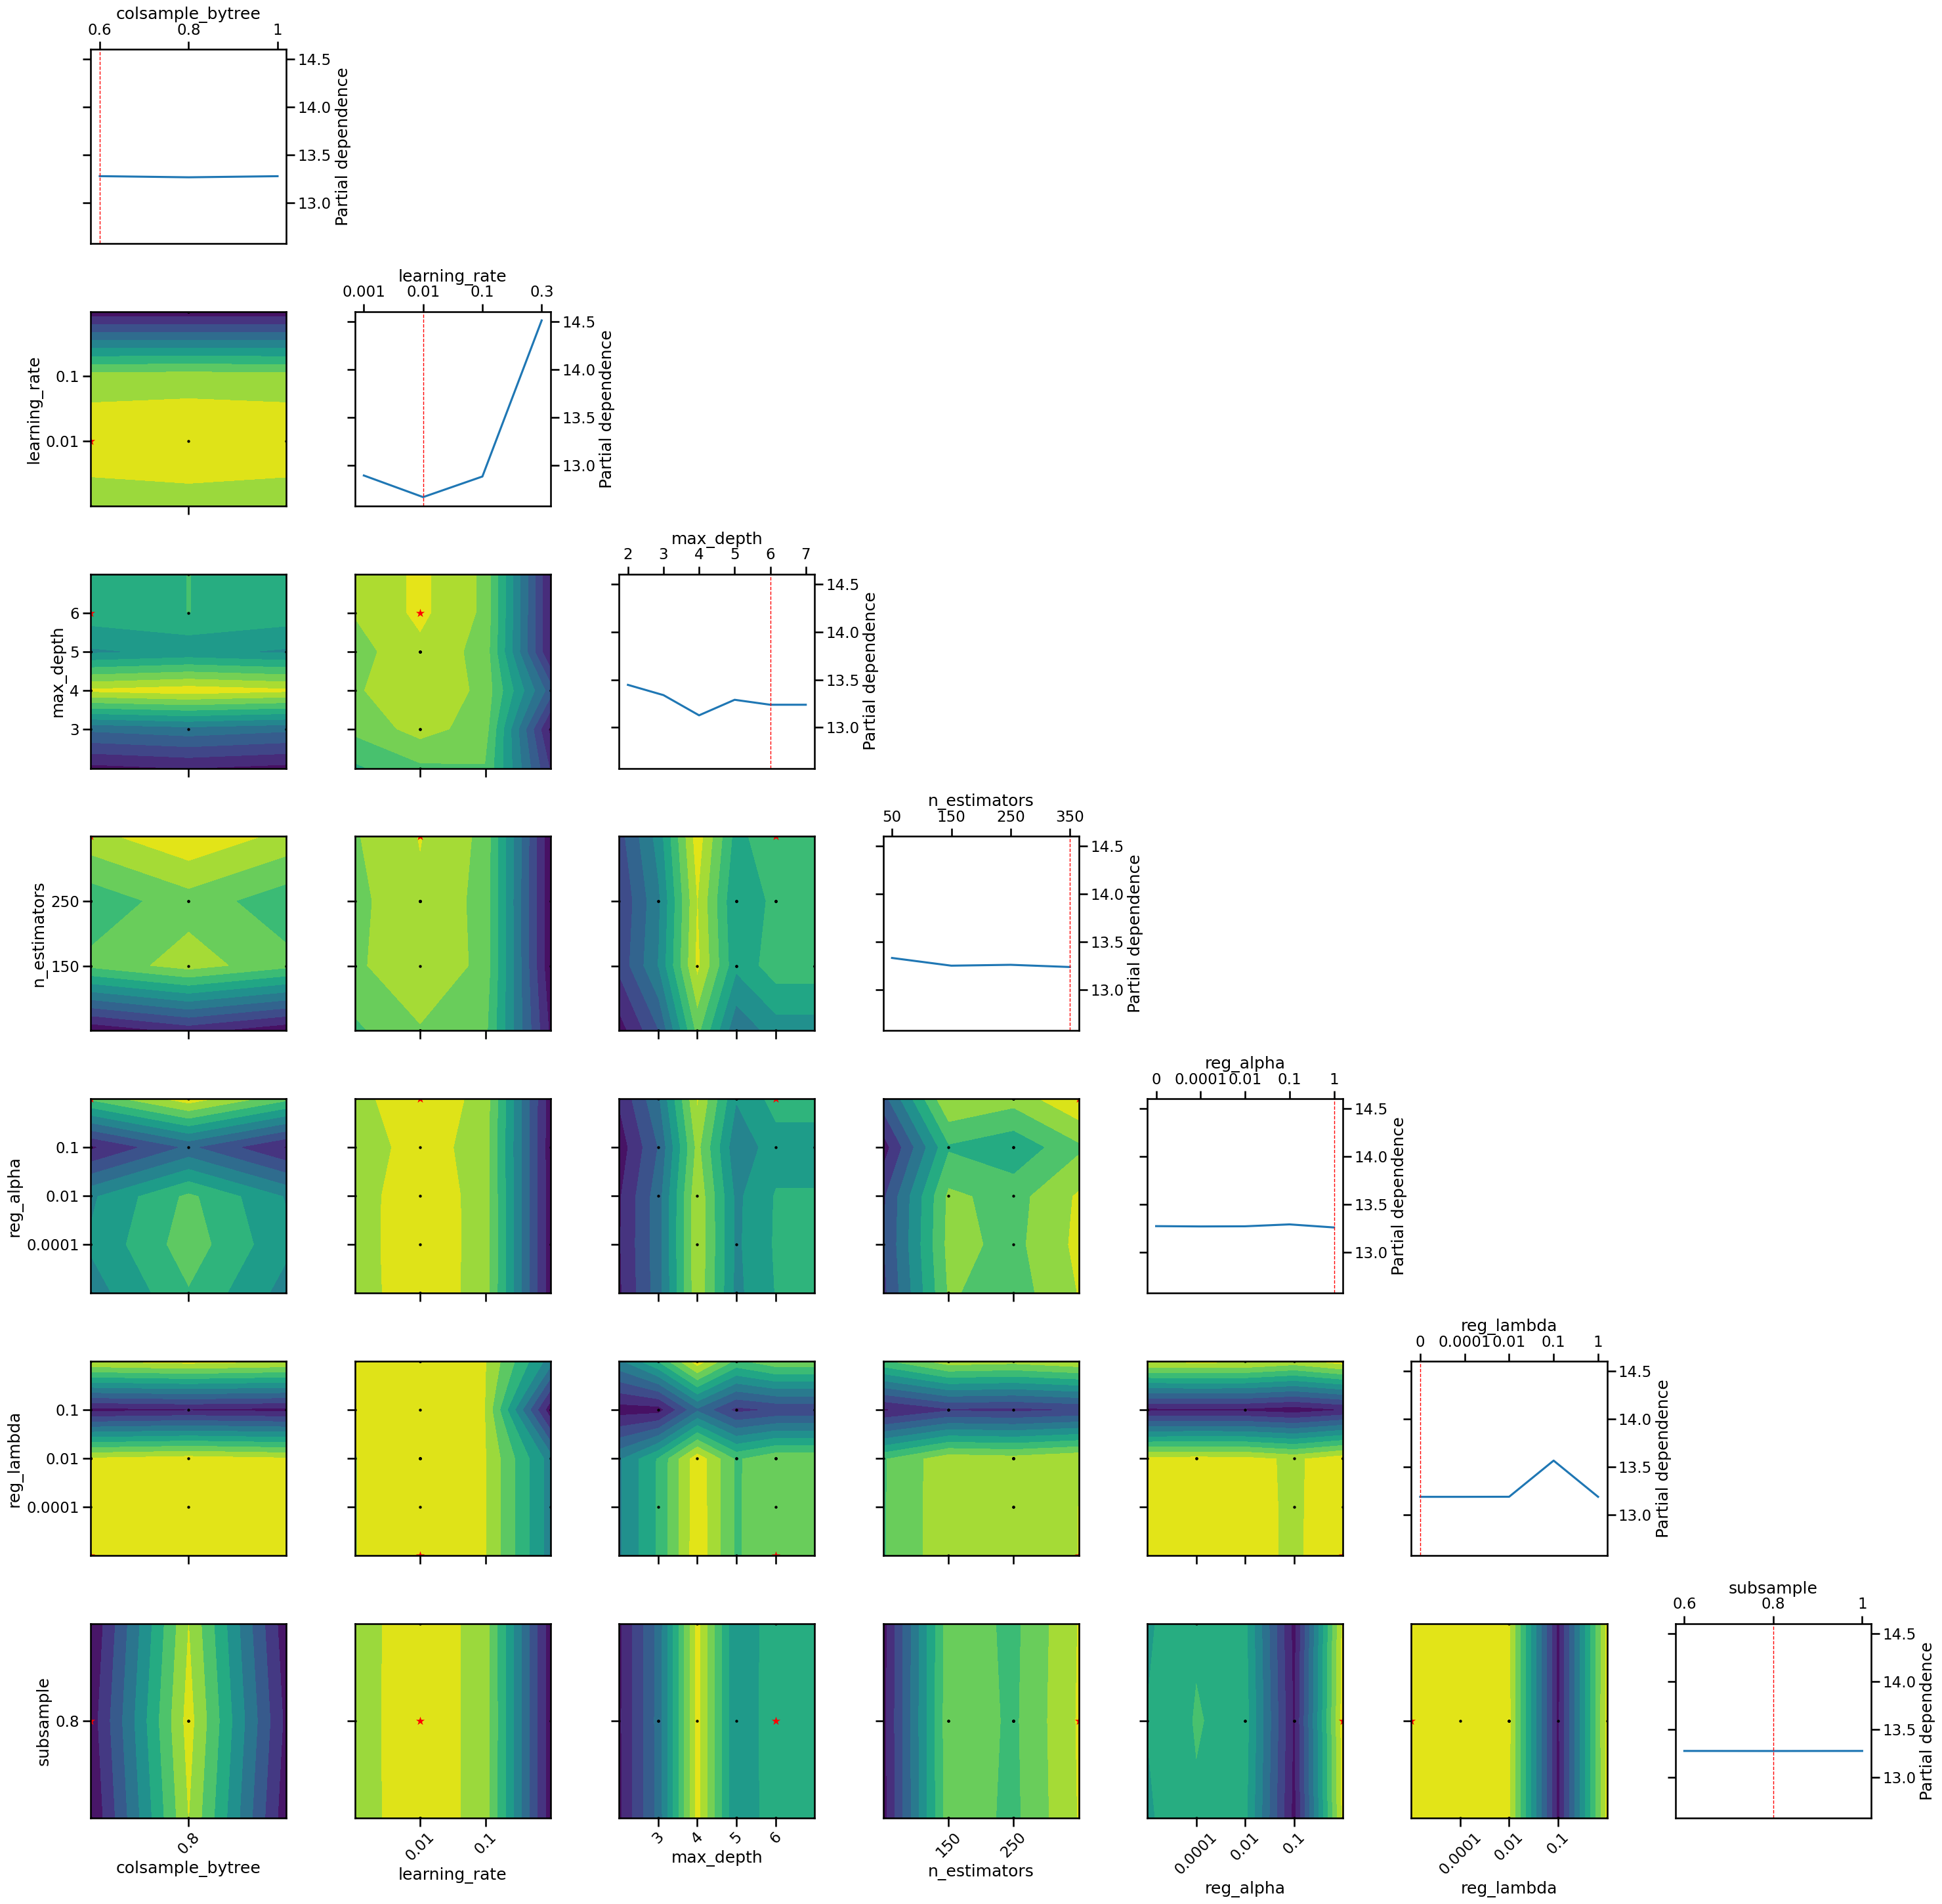


Train Metrics: {'mse': 3.873316572295142, 'mae': 1.4526547826881544, 'r2': 0.5665565730423946, 'pearson_corr': 0.8465062097870361, 'connectome_corr': 0.8633524307312933, 'connectome_r2': 0.5649627018060768, 'geodesic_distance': 13.605006793294784}
Test Metrics: {'mse': 10.50216235478364, 'mae': 2.5450224575053157, 'r2': 0.03423225445898524, 'pearson_corr': 0.34003034591373793, 'connectome_corr': 0.27898583644880254, 'connectome_r2': 0.021252442859714973, 'geodesic_distance': 12.687977837594854}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'ma

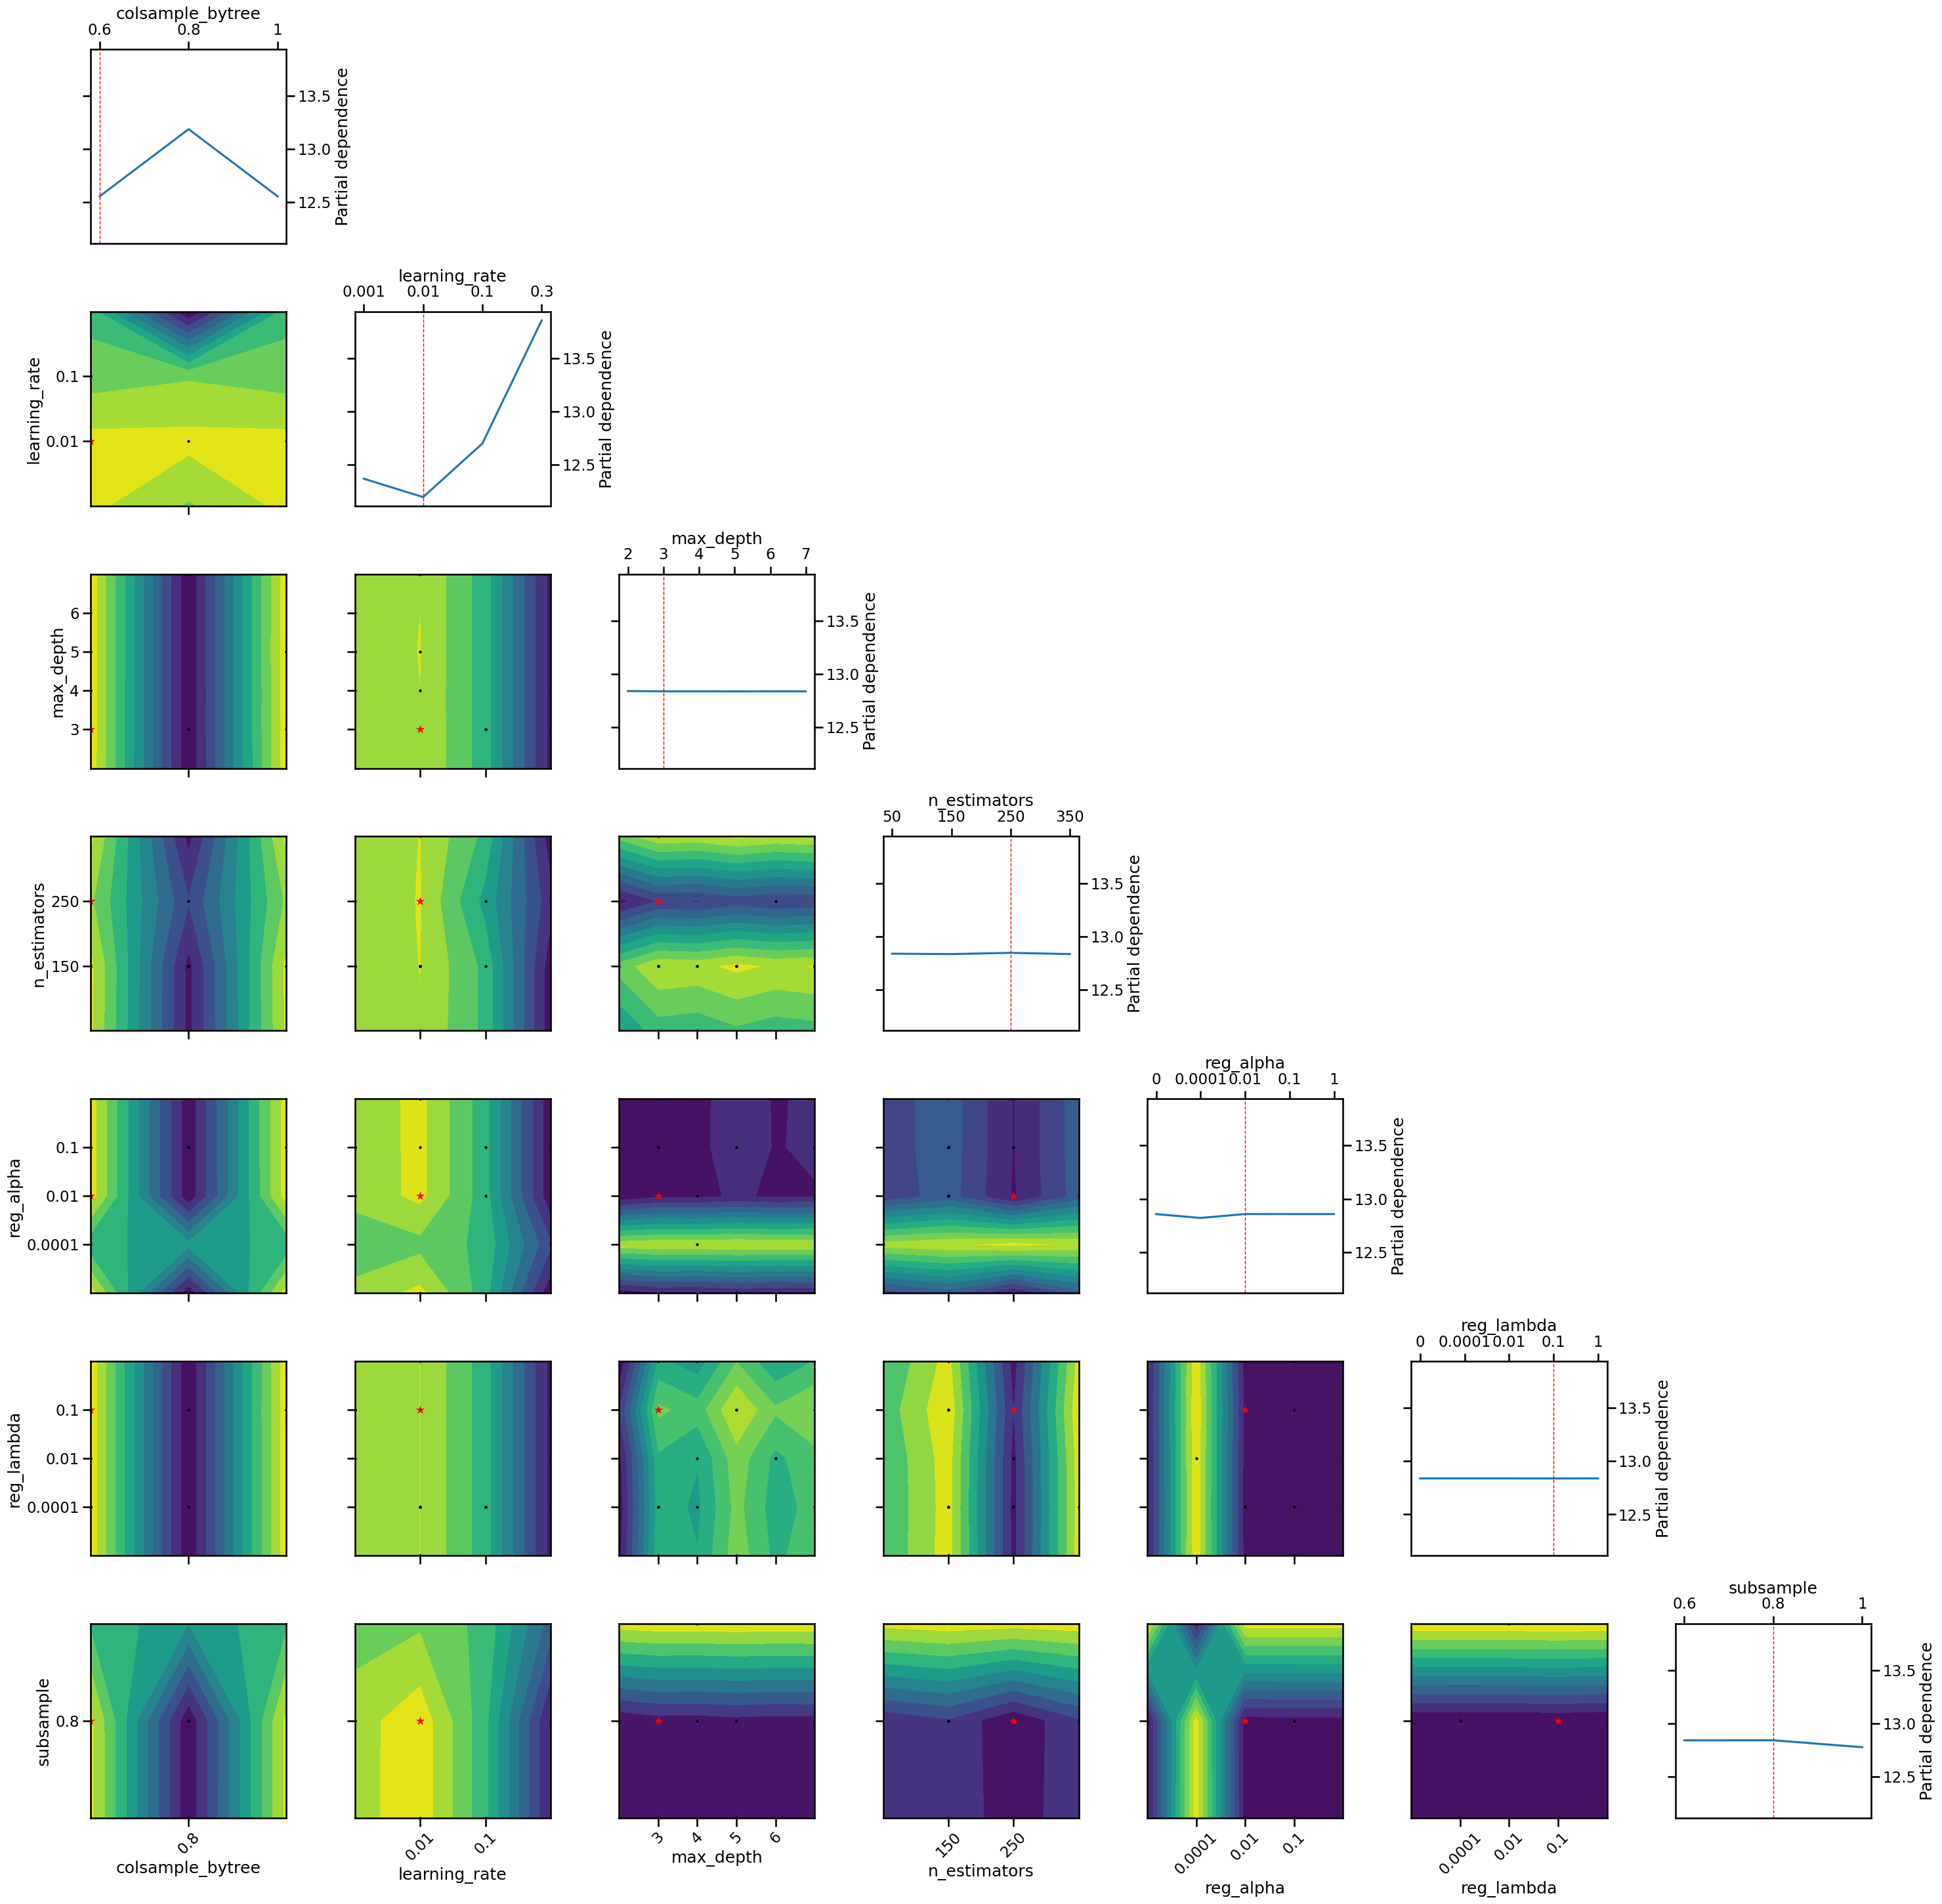


Train Metrics: {'mse': 8.23410629640506, 'mae': 2.271098219992864, 'r2': 0.16330327573827014, 'pearson_corr': 0.5287951724648716, 'connectome_corr': 0.5077408774028003, 'connectome_r2': 0.15953021041496002, 'geodesic_distance': 17.313470973061495}
Test Metrics: {'mse': 12.199141578051366, 'mae': 2.8615533973141893, 'r2': -0.03456528383974514, 'pearson_corr': 0.2374474639008657, 'connectome_corr': 0.16070086709050815, 'connectome_r2': -0.047392081957518074, 'geodesic_distance': 13.713313412599163}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, '

In [19]:
trans_to_struct_xgboost_sim_results = single_sim_run(
                                cv_type='community',
                                model_type='xgboost',
                                feature_type=['transcriptome'],
                                connectome_target='SC',
                                use_gpu=True,
                                use_shared_regions=False,
                                test_shared_regions=False,
                                save_sim=True,
                                resolution=1.01,
                                random_seed=42,
                                search_method=('bayes', 'mse')
                                )

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(7140, 22106) (7140,) (812, 22106) (812,)
2
3
4
ACCELERATING
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.001, test=-0.027) total time=   1.7s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.001, test=-0.032) total time=   1.7s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.001, test=-0.023) total time=   1.7s
[CV 1/3] 

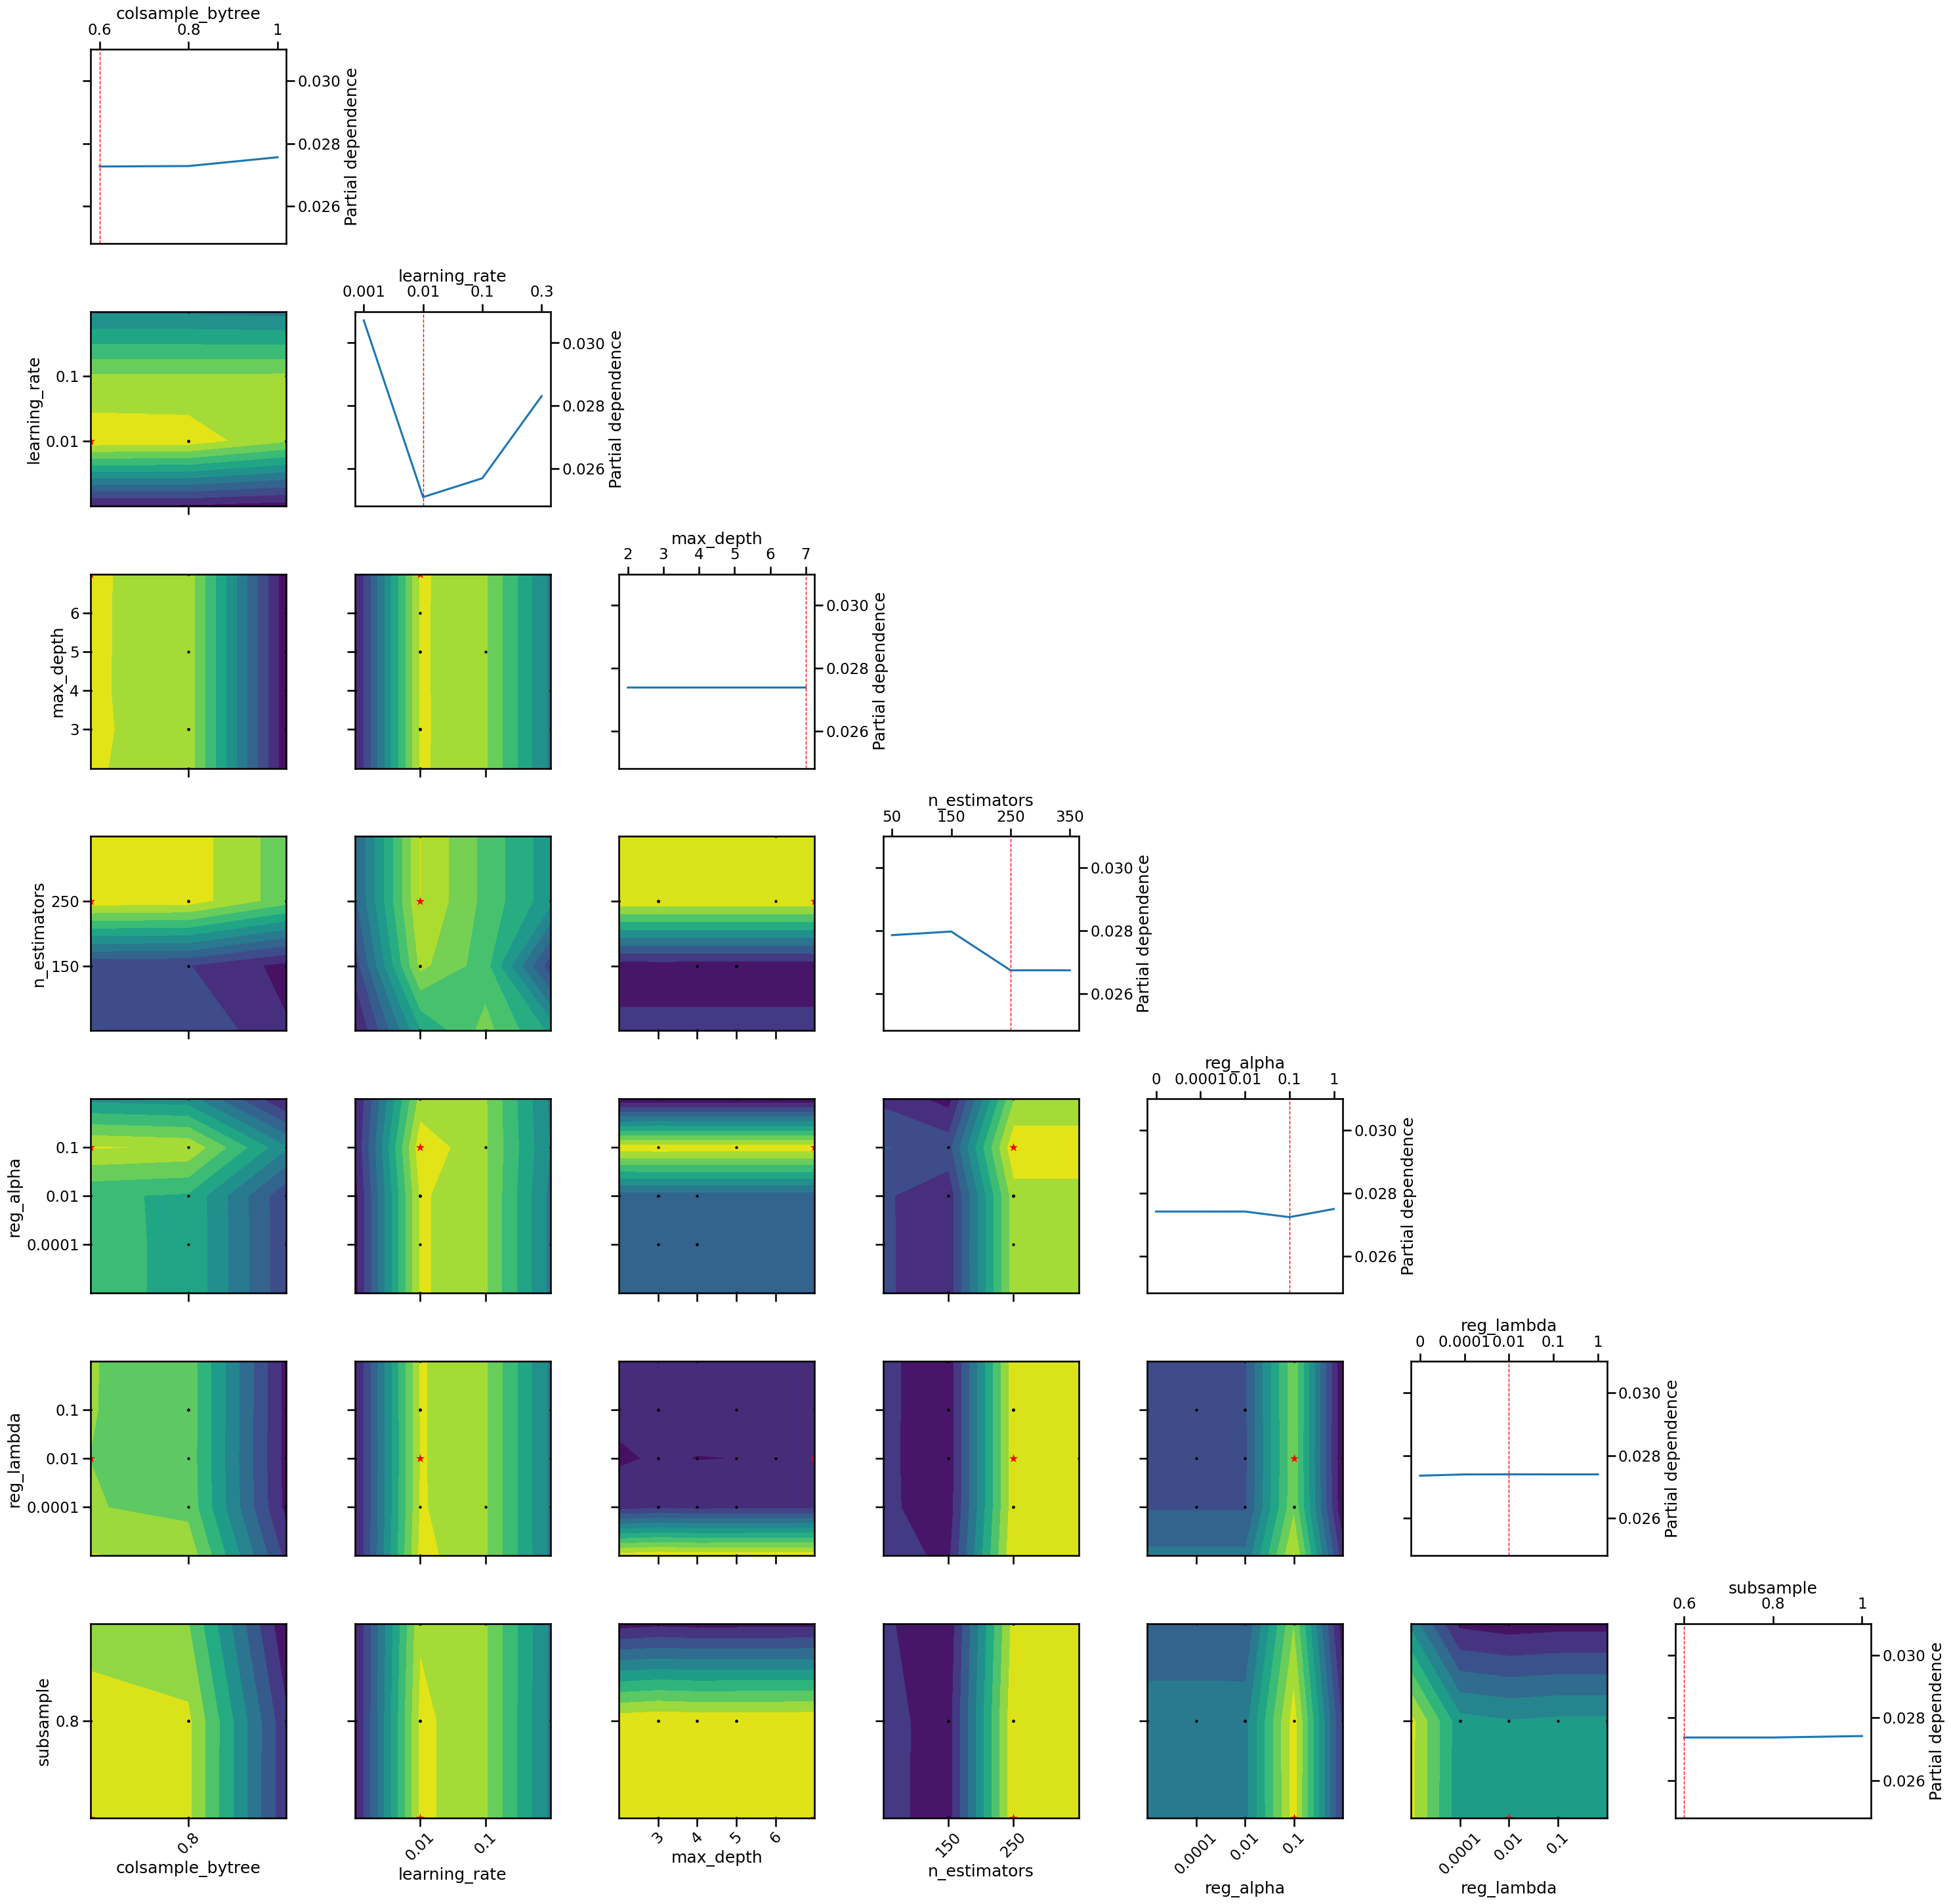


Train Metrics: {'mse': 0.004996755832361254, 'mae': 0.0468532763894132, 'r2': 0.6727750692441781, 'pearson_corr': 0.9430131990946264, 'connectome_corr': 0.9109384057119652, 'connectome_r2': 0.6567551073499933, 'geodesic_distance': 7.543372263279343}
Test Metrics: {'mse': 0.019308741250867727, 'mae': 0.10356822685838331, 'r2': -1.5696341049206333, 'pearson_corr': 0.6106693845528723, 'connectome_corr': 0.46043216807892307, 'connectome_r2': -1.9631108928002408, 'geodesic_distance': 6.189344136734001}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 

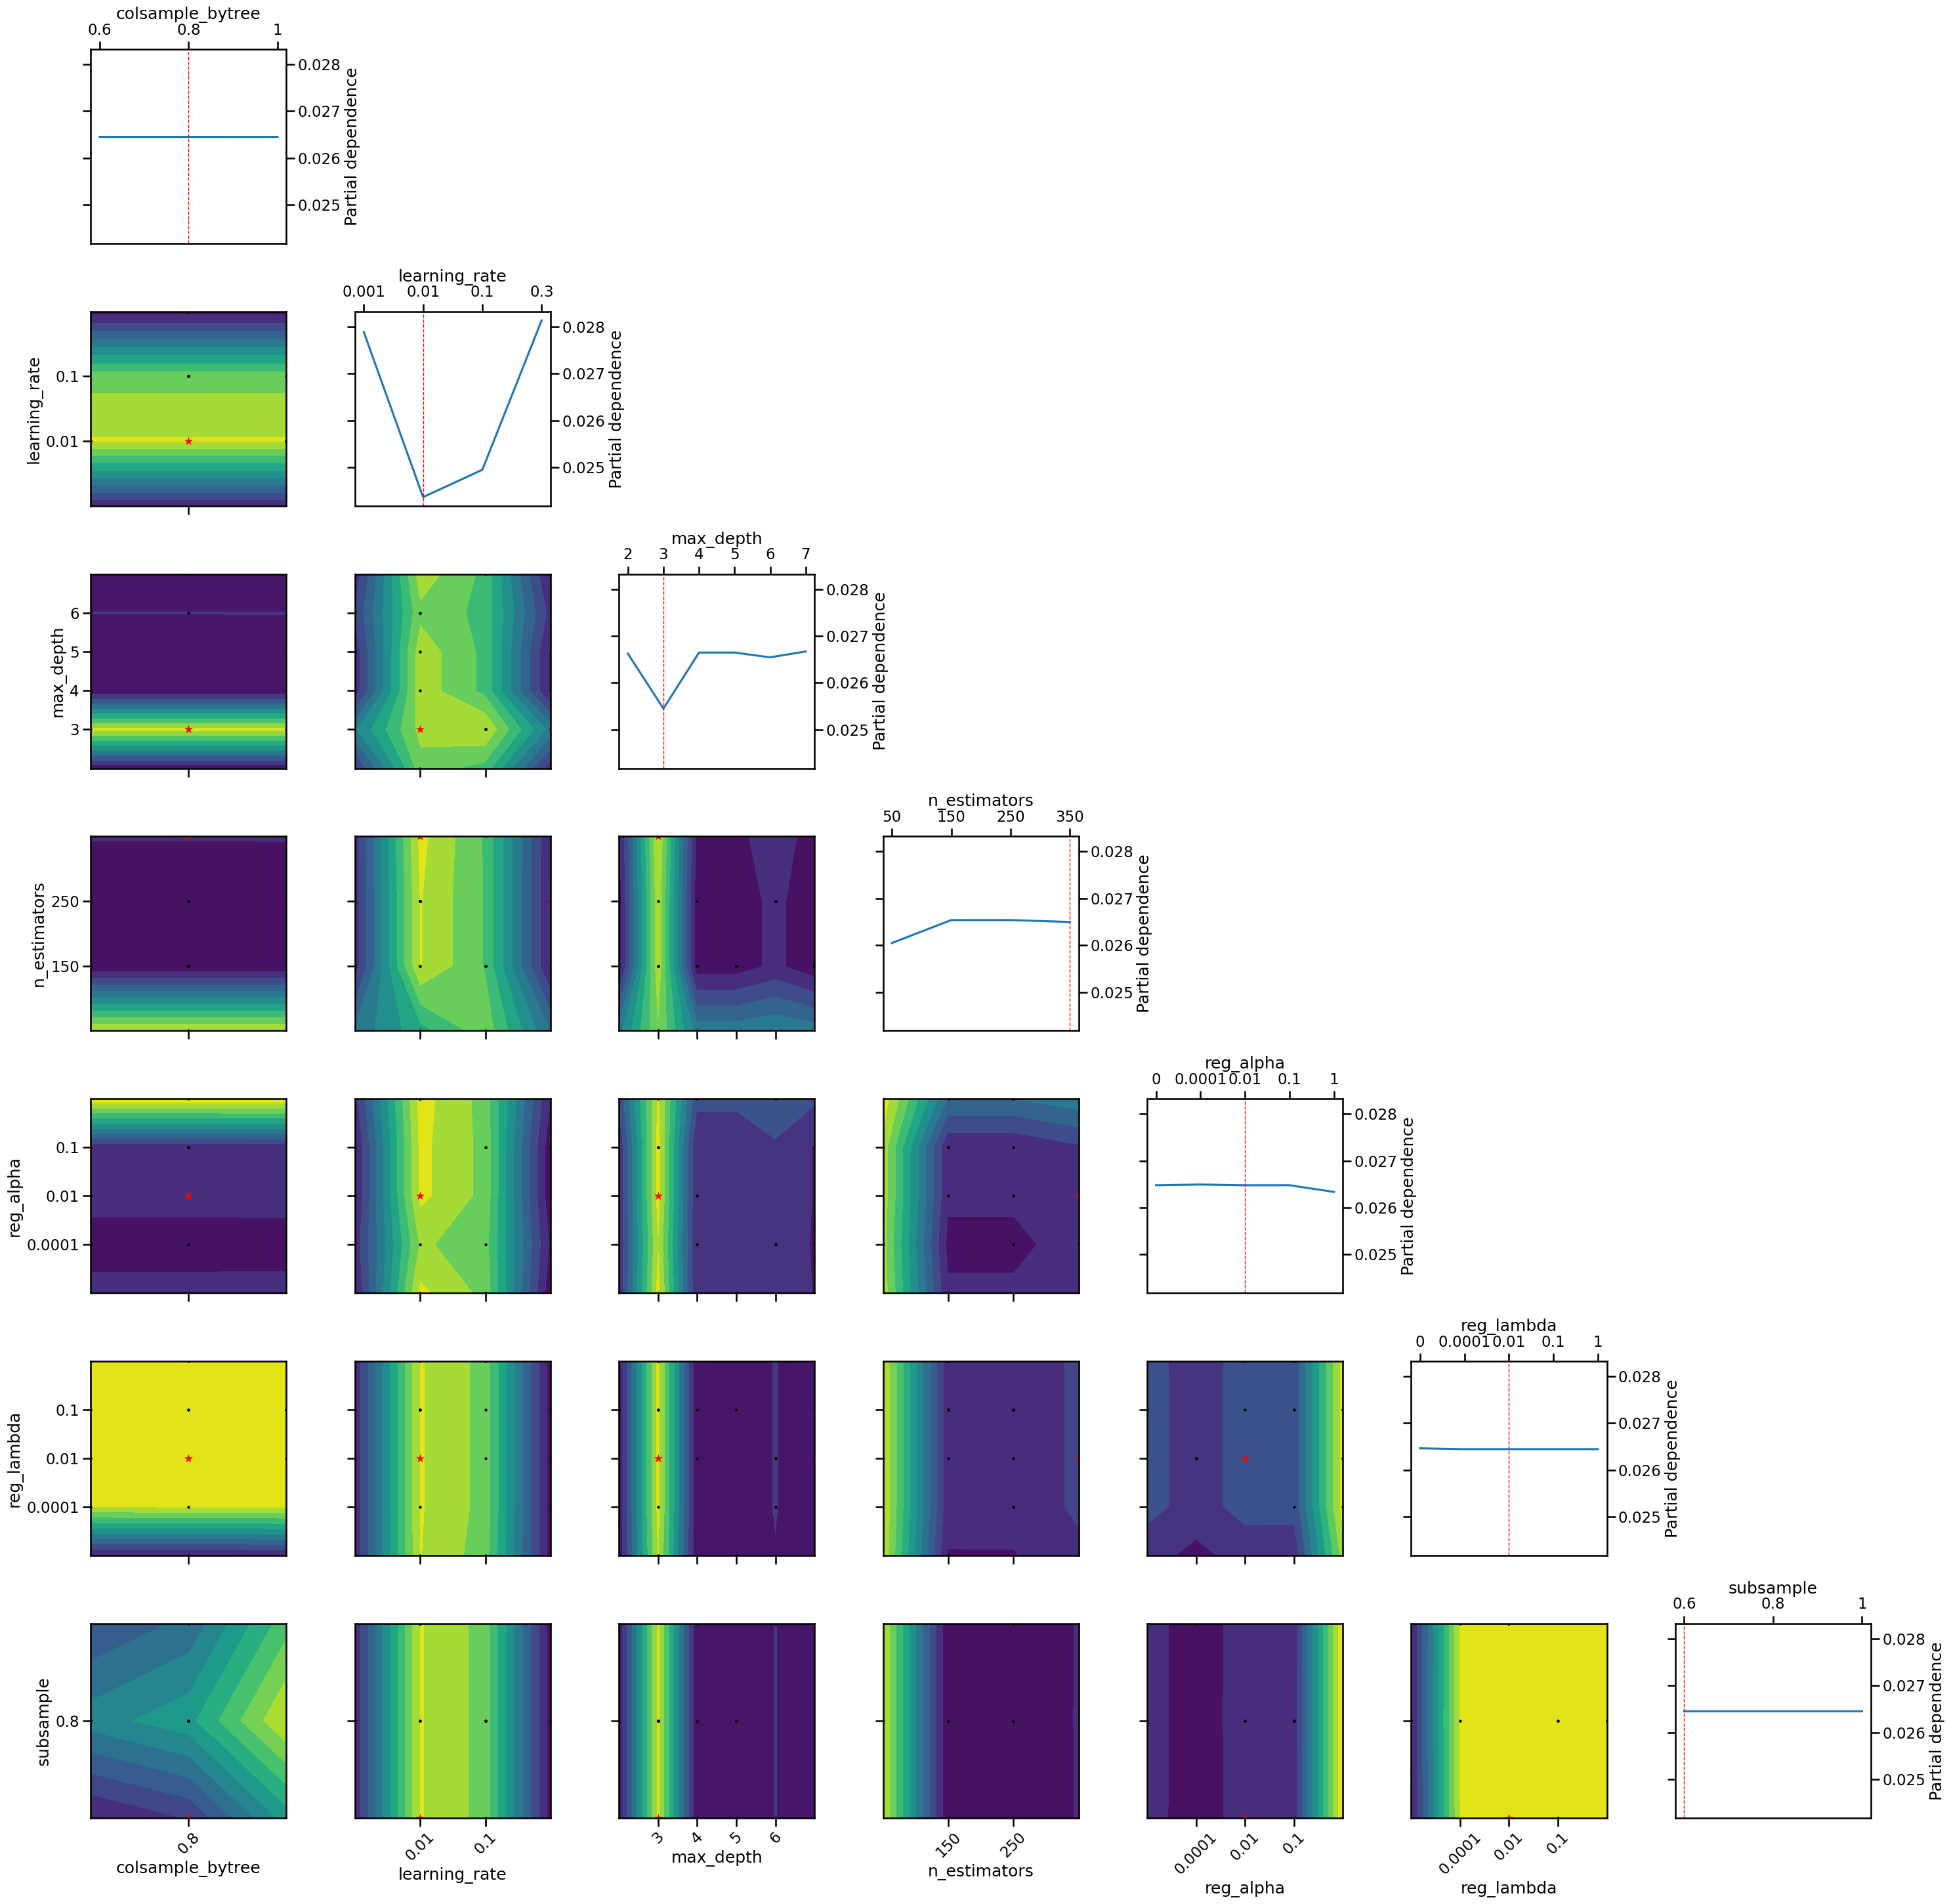


Train Metrics: {'mse': 0.015290126103873758, 'mae': 0.0848468925456239, 'r2': 0.2664429609657939, 'pearson_corr': 0.7299826433938541, 'connectome_corr': 0.5952994384614484, 'connectome_r2': 0.23520548990805107, 'geodesic_distance': 10.144594187890615}
Test Metrics: {'mse': 0.021458190250279025, 'mae': 0.11000072753503053, 'r2': -2.472636432275443, 'pearson_corr': 0.6758637737618466, 'connectome_corr': 0.5468193456609832, 'connectome_r2': -2.9823500896638597, 'geodesic_distance': 5.681075796659293}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 

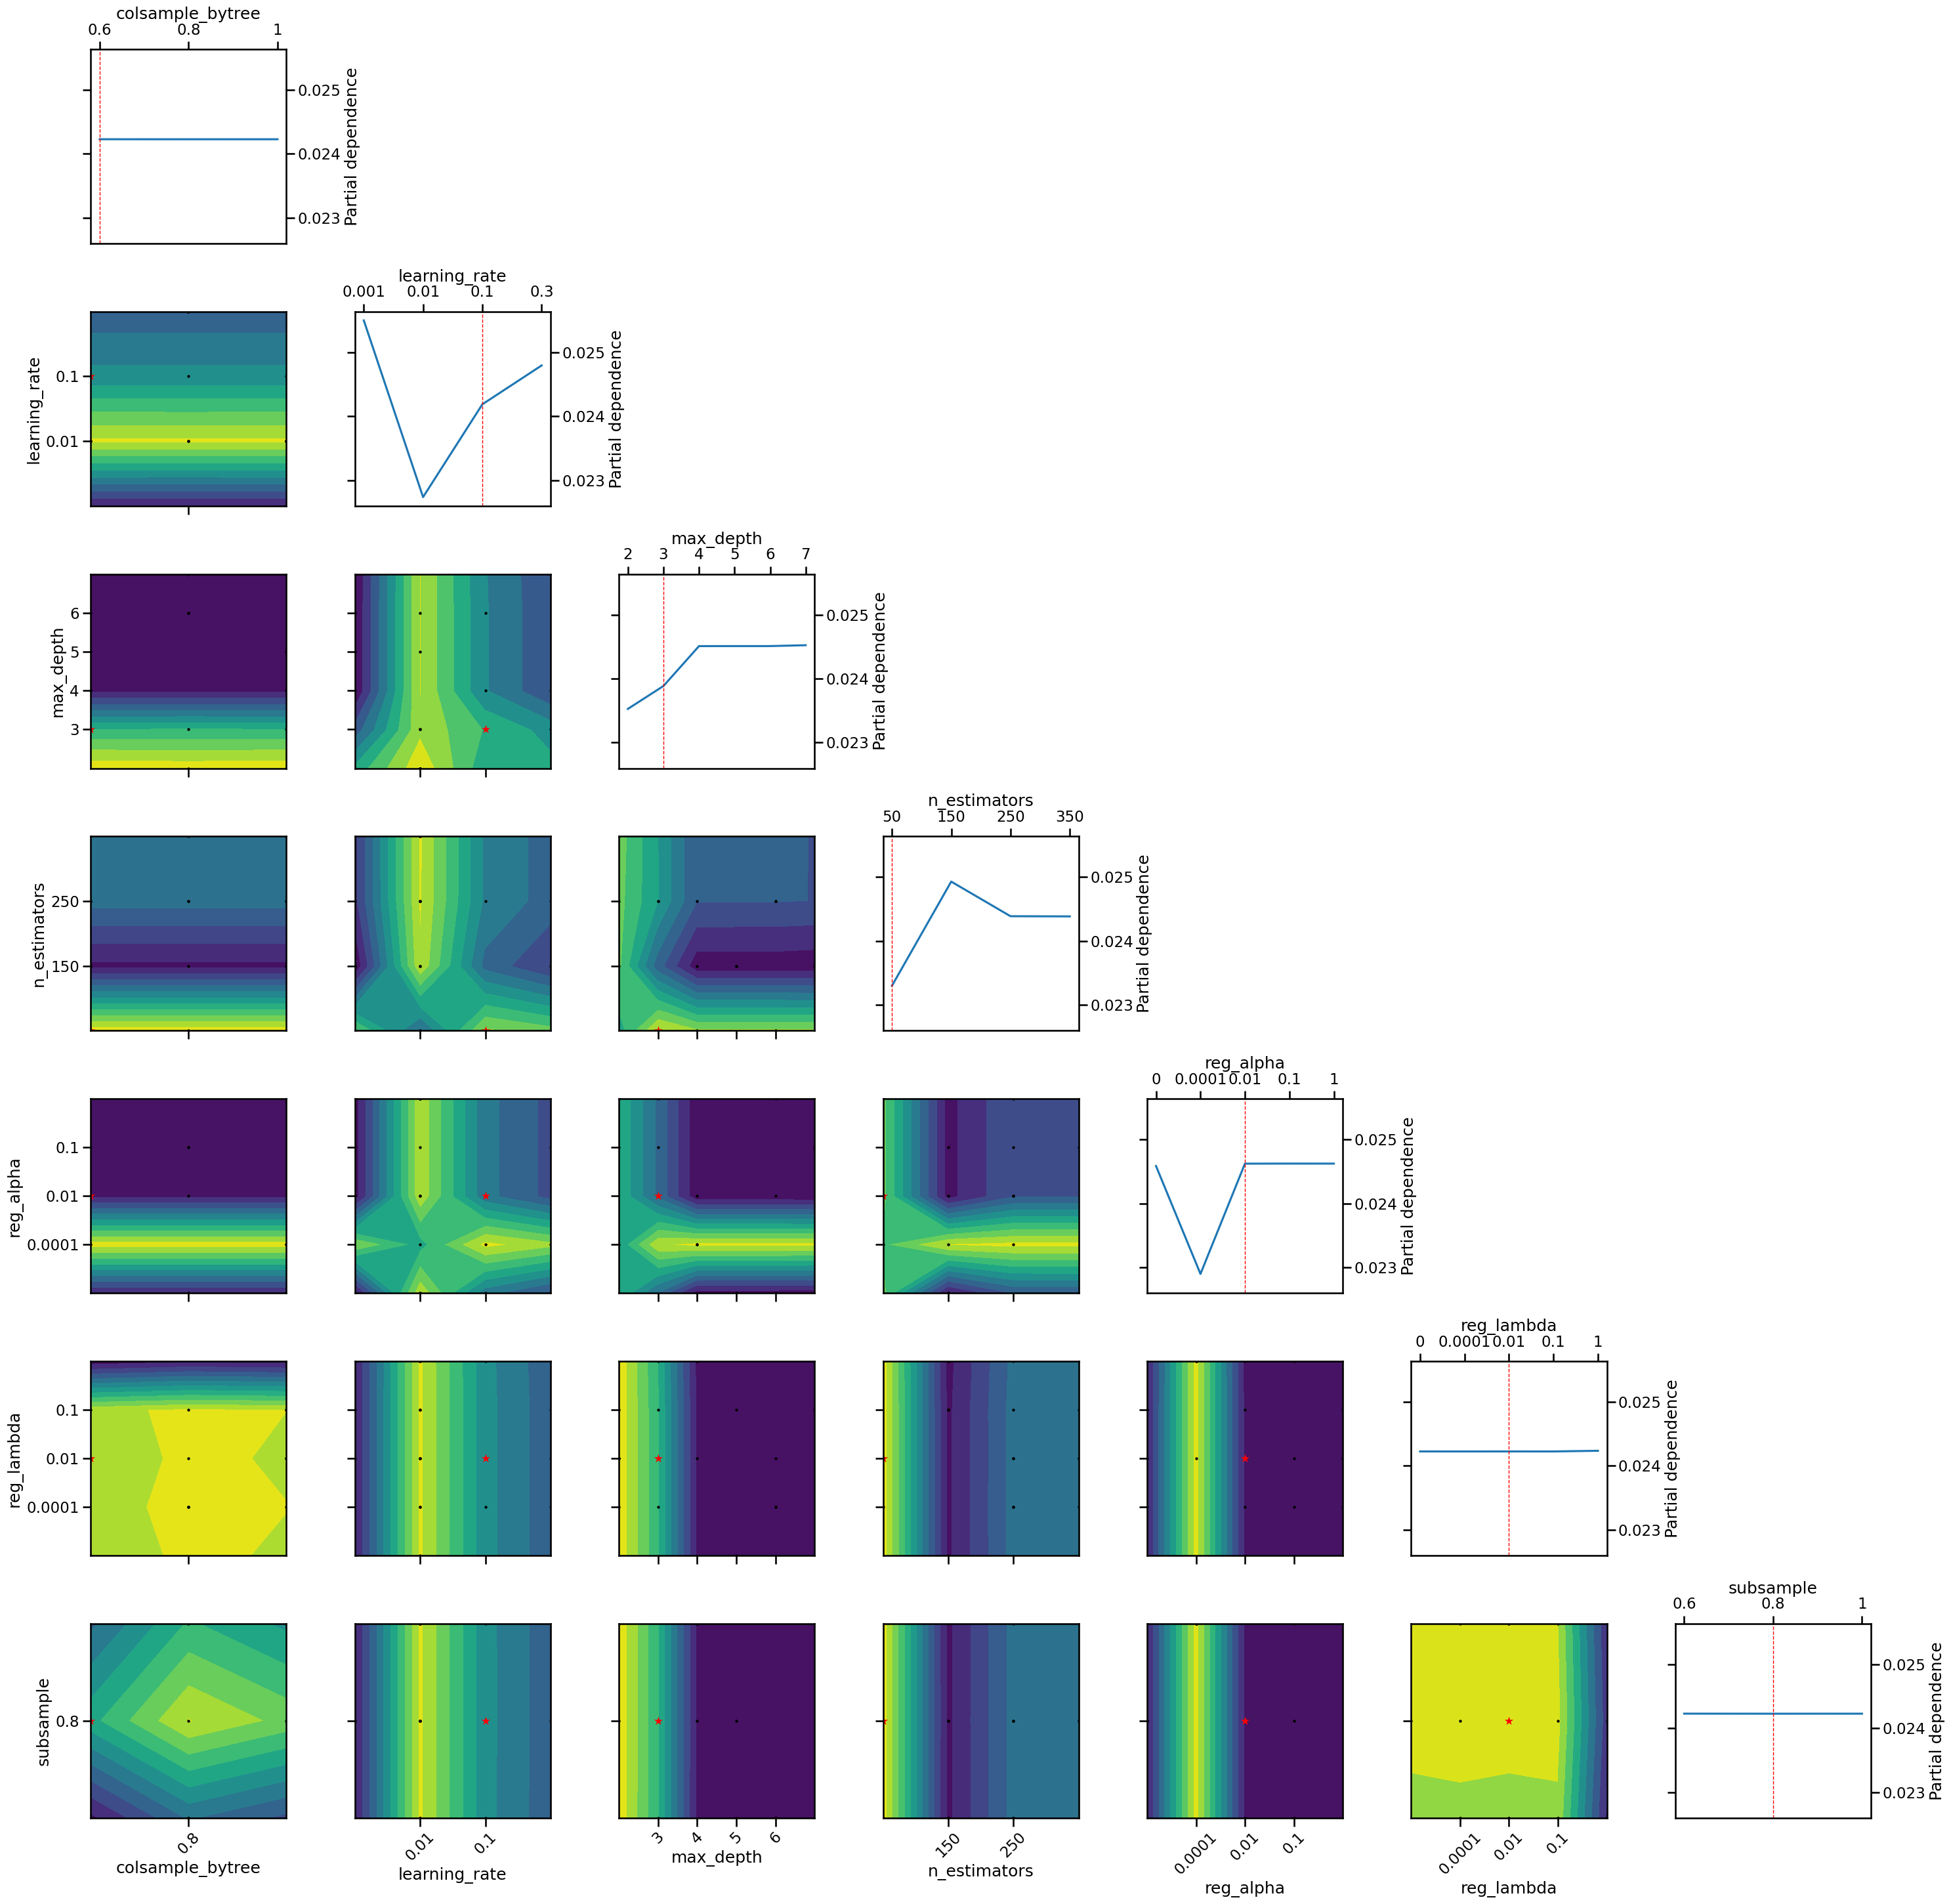


Train Metrics: {'mse': 0.011295933715079589, 'mae': 0.07150415967138228, 'r2': 0.45258285414283583, 'pearson_corr': 0.8180031722687481, 'connectome_corr': 0.6847406229618926, 'connectome_r2': 0.4317616638235412, 'geodesic_distance': 10.901243847502611}
Test Metrics: {'mse': 0.025596484559084504, 'mae': 0.11743927871672574, 'r2': 0.01024598576959341, 'pearson_corr': 0.447098536227565, 'connectome_corr': 0.26390422897761723, 'connectome_r2': -0.21139897725359427, 'geodesic_distance': 6.136186740541711}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None

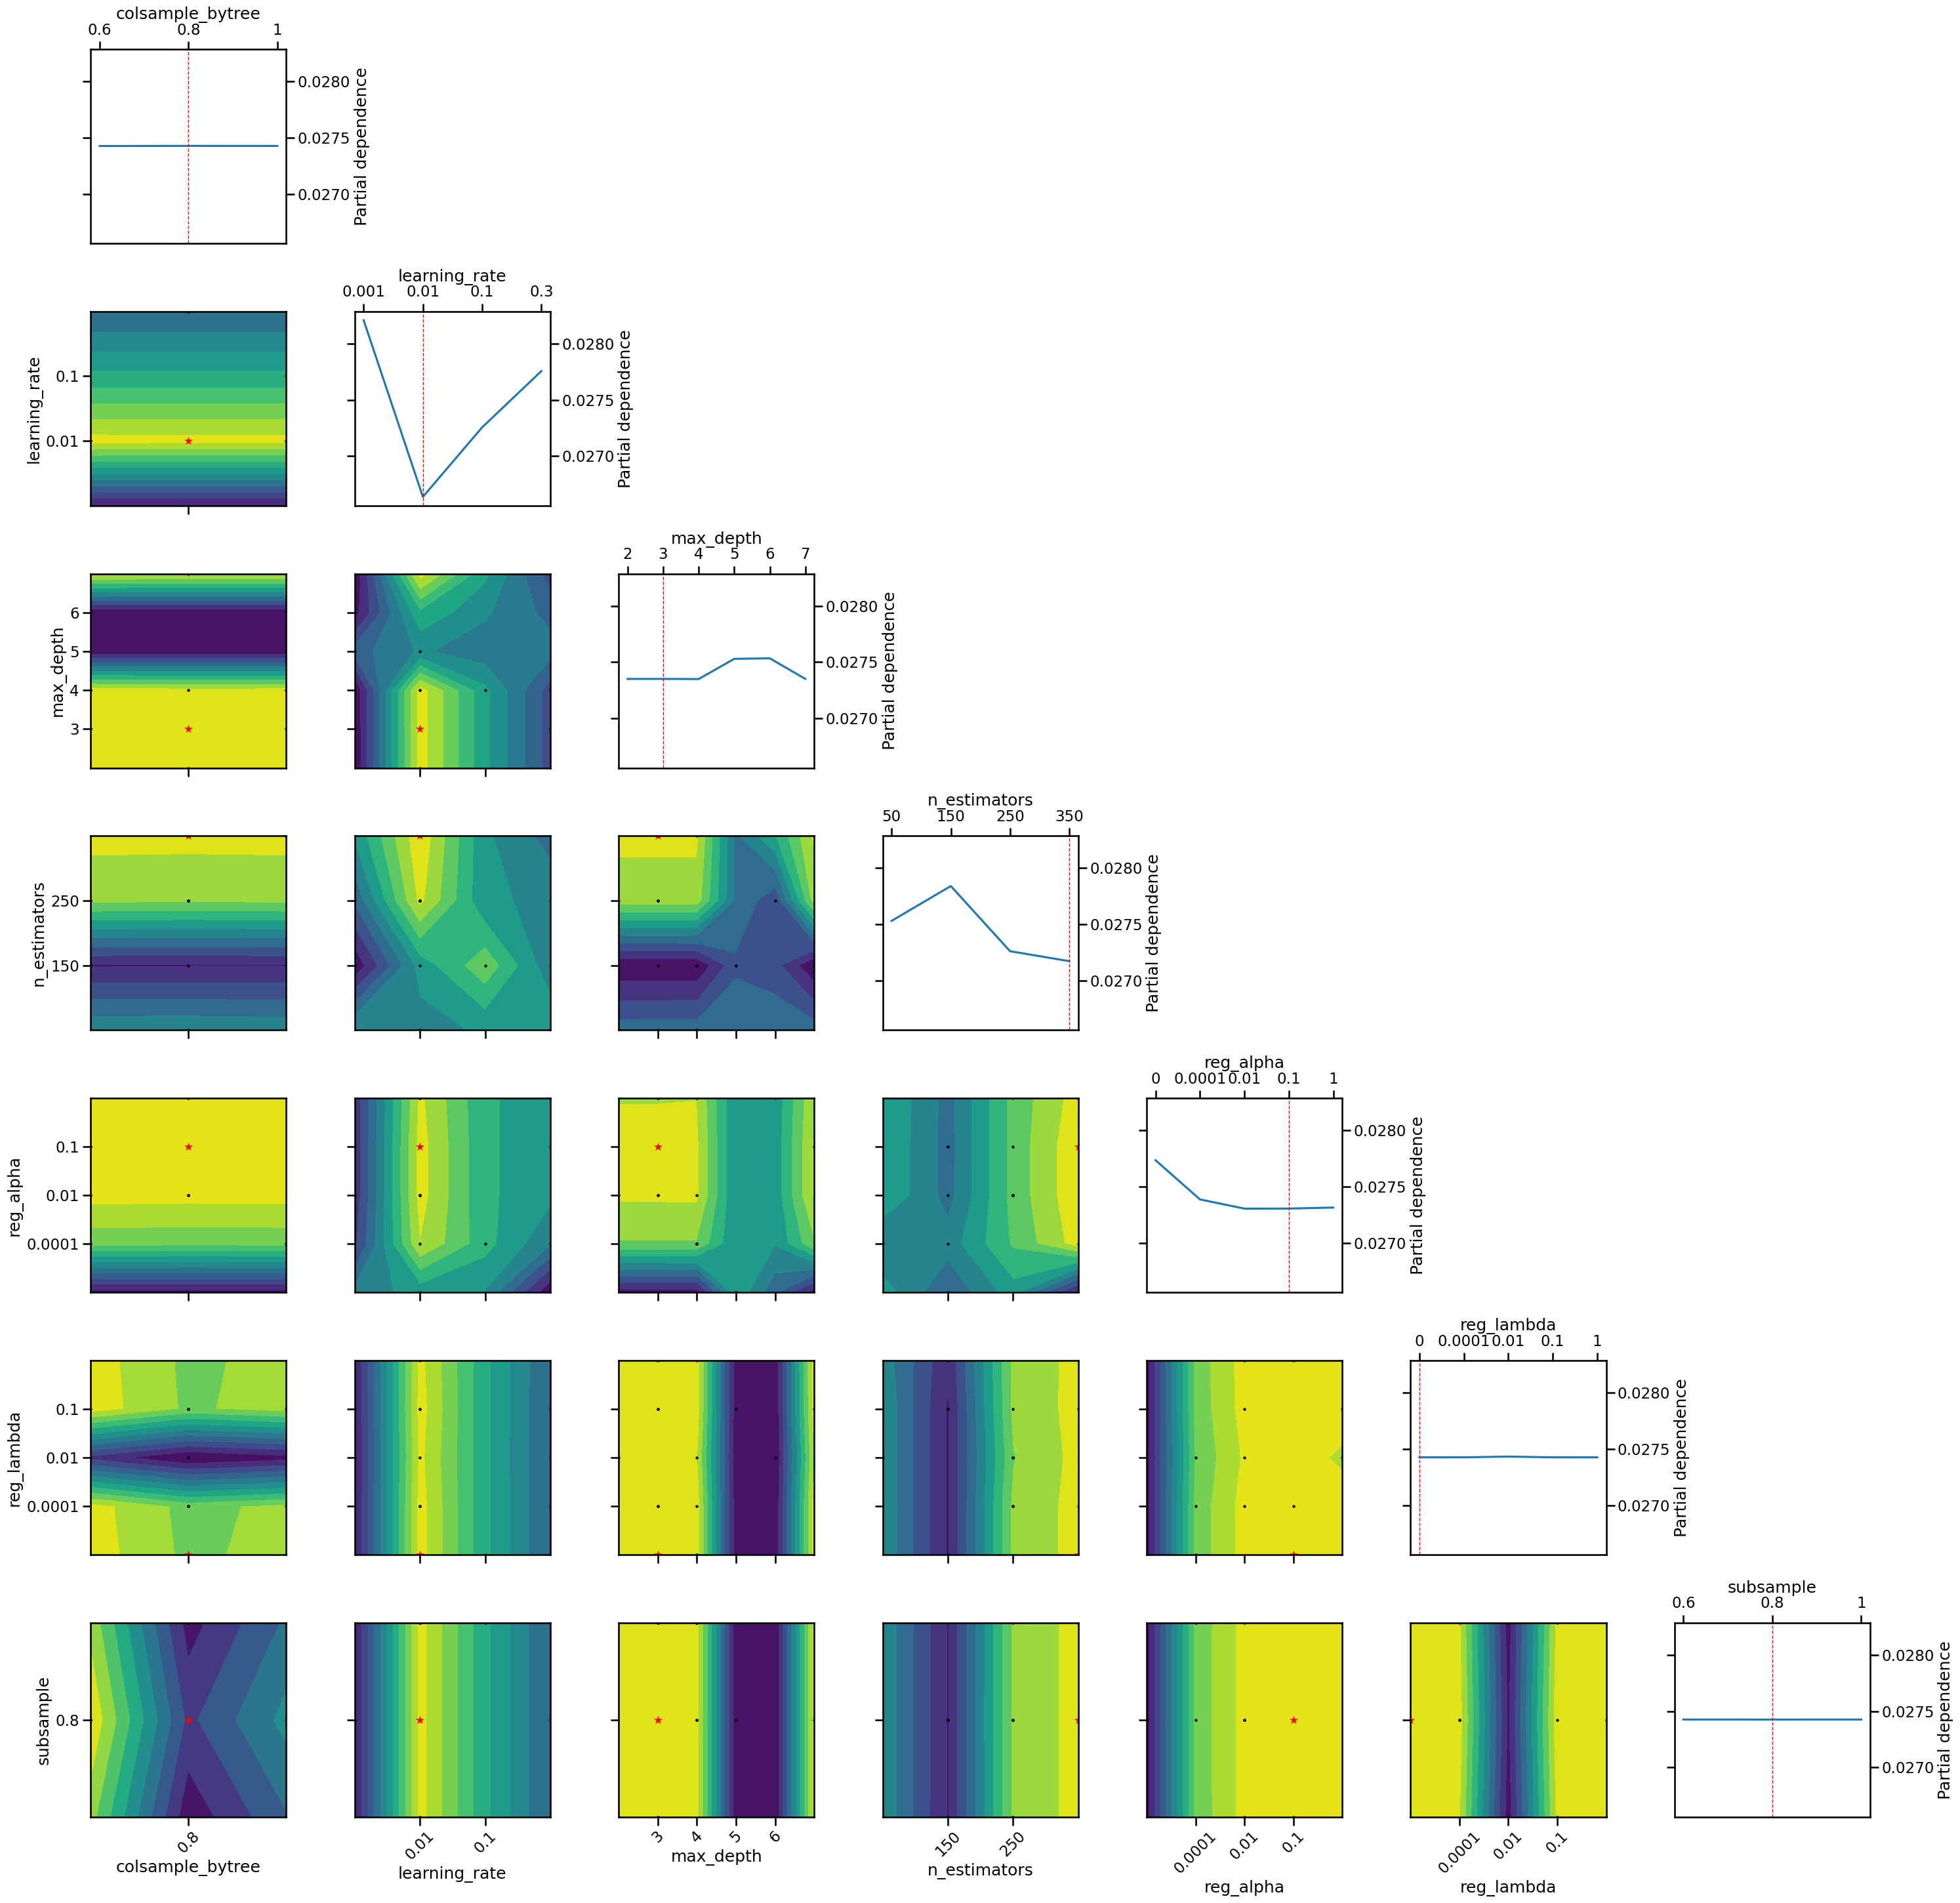


Train Metrics: {'mse': 0.01590429316210619, 'mae': 0.08560320939219547, 'r2': 0.3012799934977086, 'pearson_corr': 0.7414669855946311, 'connectome_corr': 0.6196469006235893, 'connectome_r2': 0.2703433473023495, 'geodesic_distance': 9.987778468123391}
Test Metrics: {'mse': 0.018486259990586767, 'mae': 0.09498421417870449, 'r2': -0.8718864219495966, 'pearson_corr': 0.6376333643329231, 'connectome_corr': 0.30308585692795076, 'connectome_r2': -1.082247165803156, 'geodesic_distance': 7.080483557249286}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, '

In [18]:
trans_to_func_xgboost_sim_results = single_sim_run(
                        cv_type='random',
                        model_type='xgboost',
                        feature_type=['transcriptome'],
                        connectome_target='FC',
                        use_gpu=True,
                        use_shared_regions=False,
                        test_shared_regions=False,
                        save_sim=True,
                        resolution=1.01,
                        random_seed=42,
                        search_method=('bayes', 'mse')
                        )

Number of components explaining 95.0% of the variance: 34

 Test fold num: 1
(6320, 22106) (6320,) (1122, 22106) (1122,)
2
3
ACCELERATING
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.000, test=-0.031) total time=   1.4s
[CV 2/2] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.000, test=-0.034) total time=   1.1s
[CV 1/2] END colsample_bytree=0.6, device=cuda, learning_rate=0.001, max_depth=6, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=1, reg_lambda=0.01, subsample=0.6, tree_method=gpu_hist, verbosity=0;, score=(train=-0.025, test=-0.049) total time=   2.6s
[CV 2/2] EN

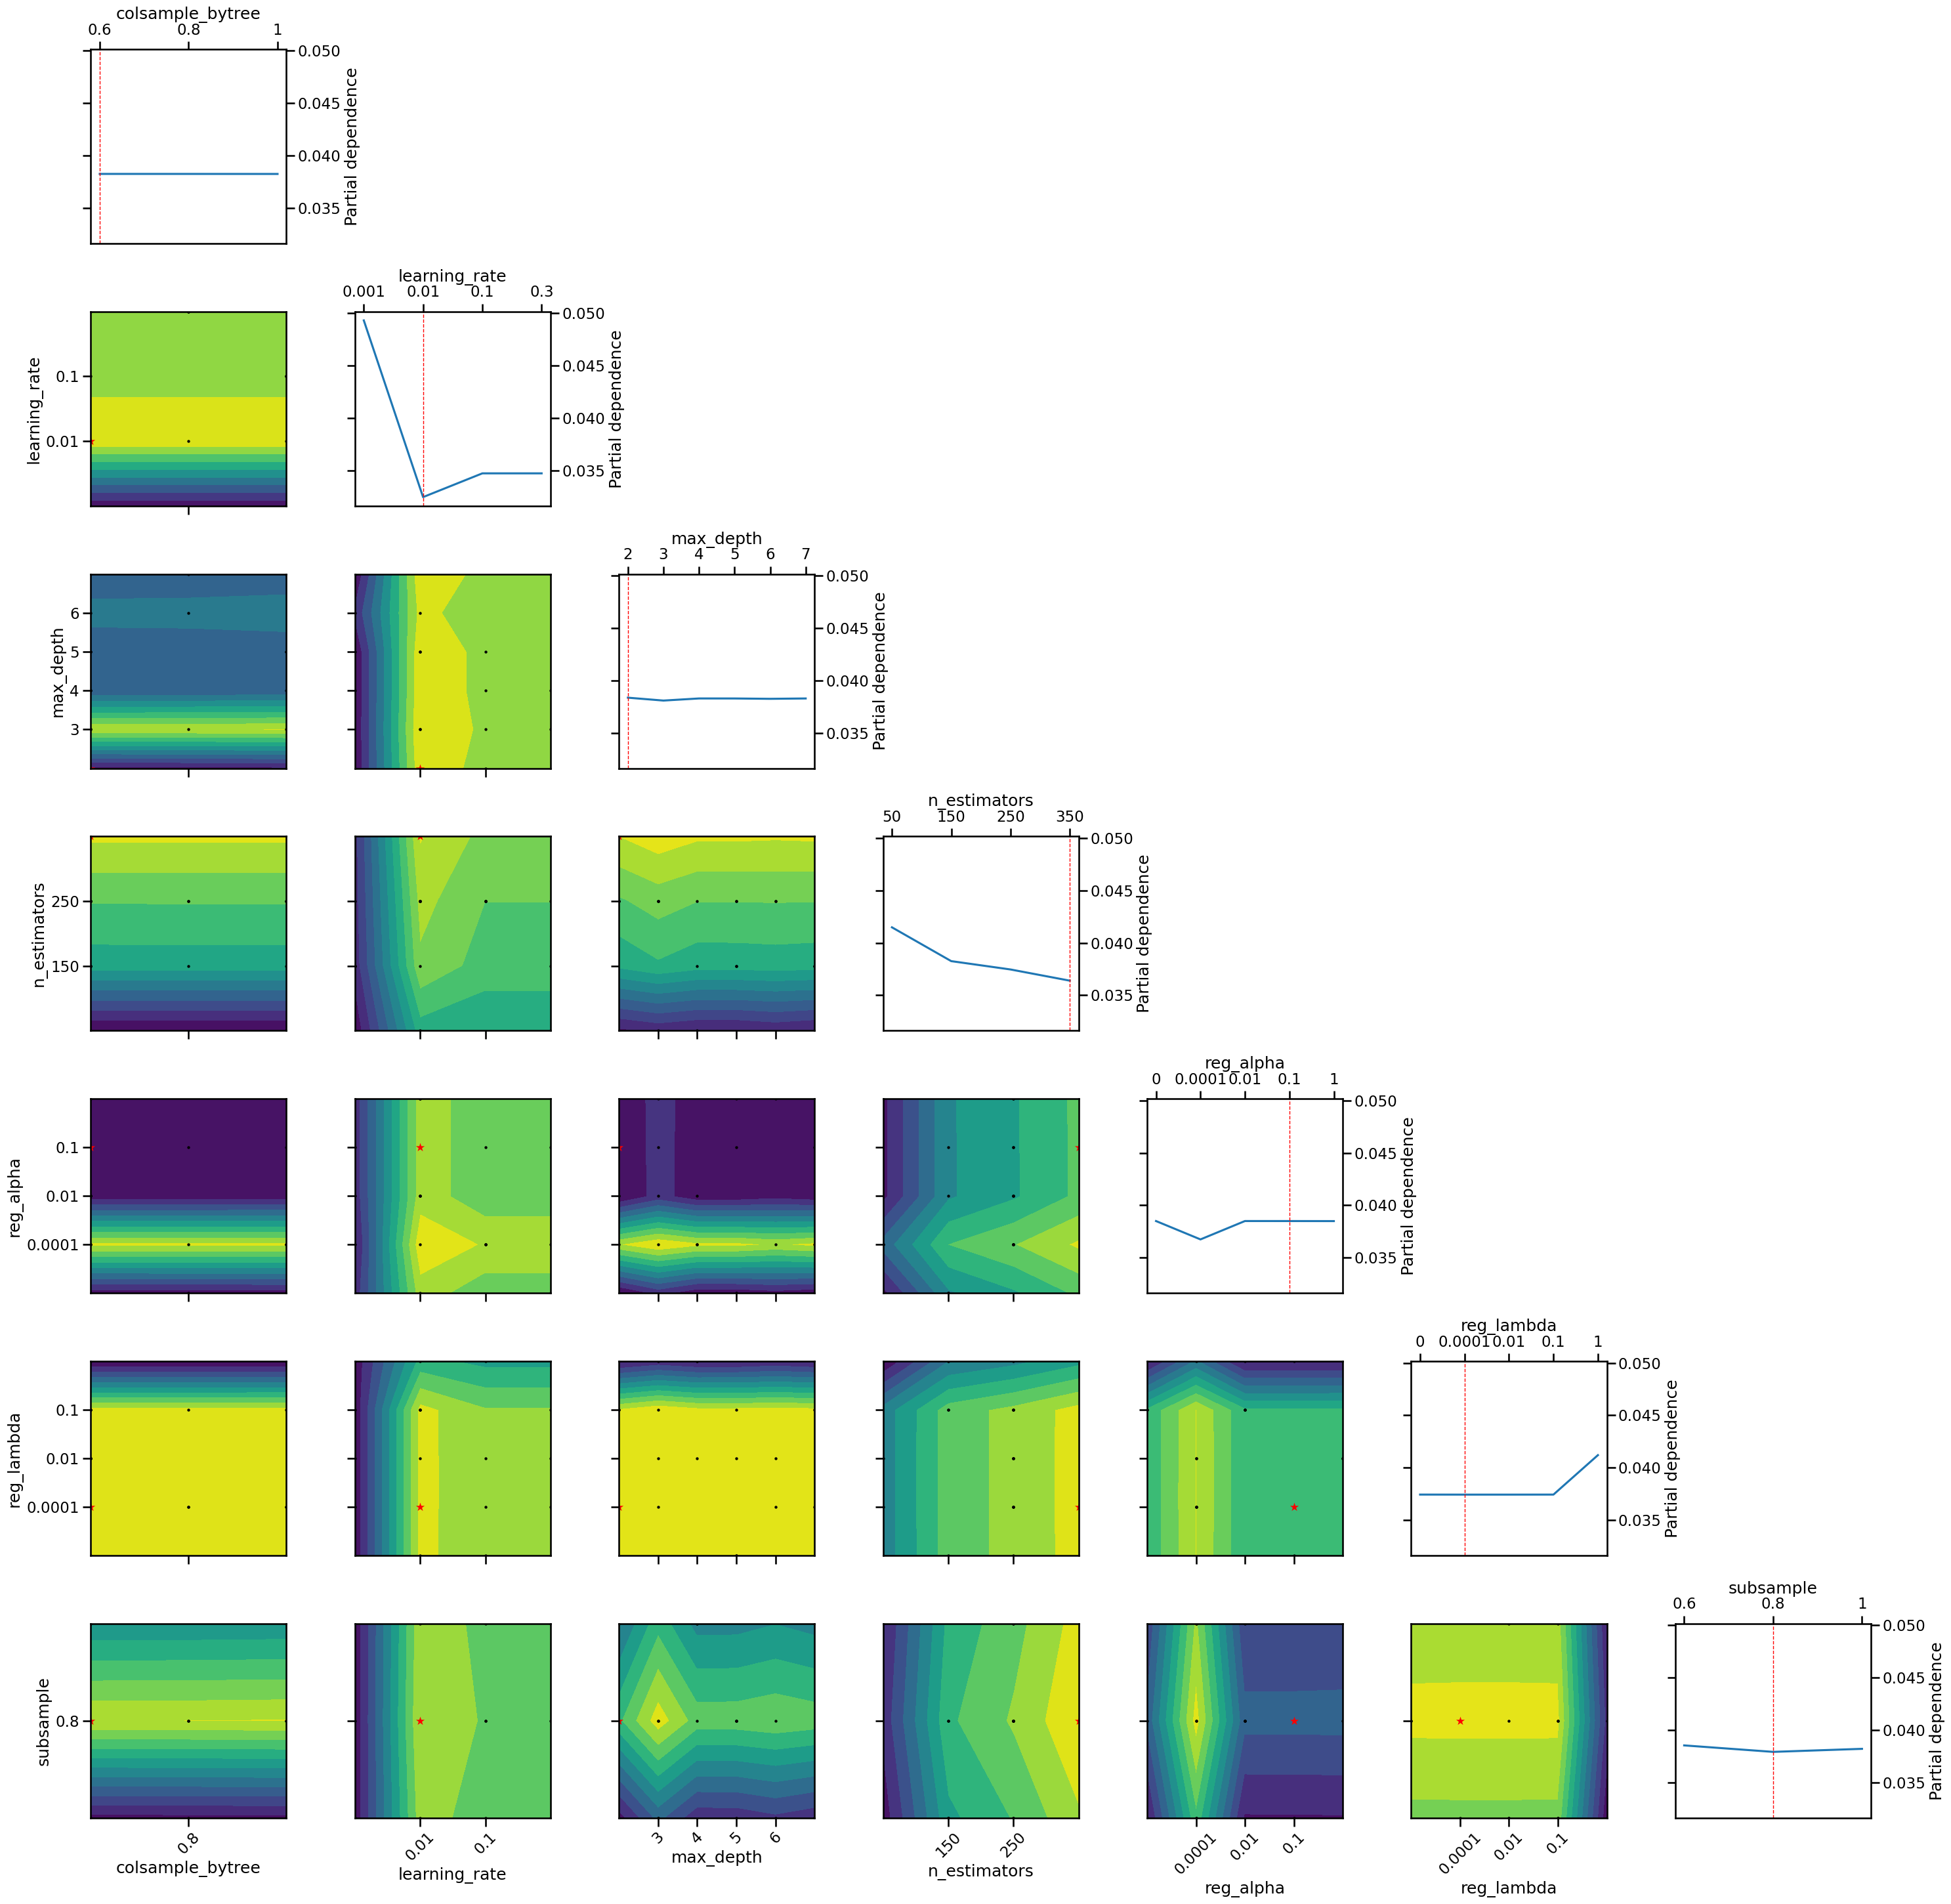


Train Metrics: {'mse': 0.020638913866728226, 'mae': 0.10280408144707927, 'r2': -0.004724965982436091, 'pearson_corr': 0.6091232923712369, 'connectome_corr': 0.4780930599994262, 'connectome_r2': -0.047196189546977255, 'geodesic_distance': 10.414410577379599}
Test Metrics: {'mse': 0.06622834314114152, 'mae': 0.18917461983545591, 'r2': -0.8471202151850477, 'pearson_corr': 0.6174406659358324, 'connectome_corr': 0.46237634759691426, 'connectome_r2': -1.276717688118921, 'geodesic_distance': 8.826983726424102}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': 

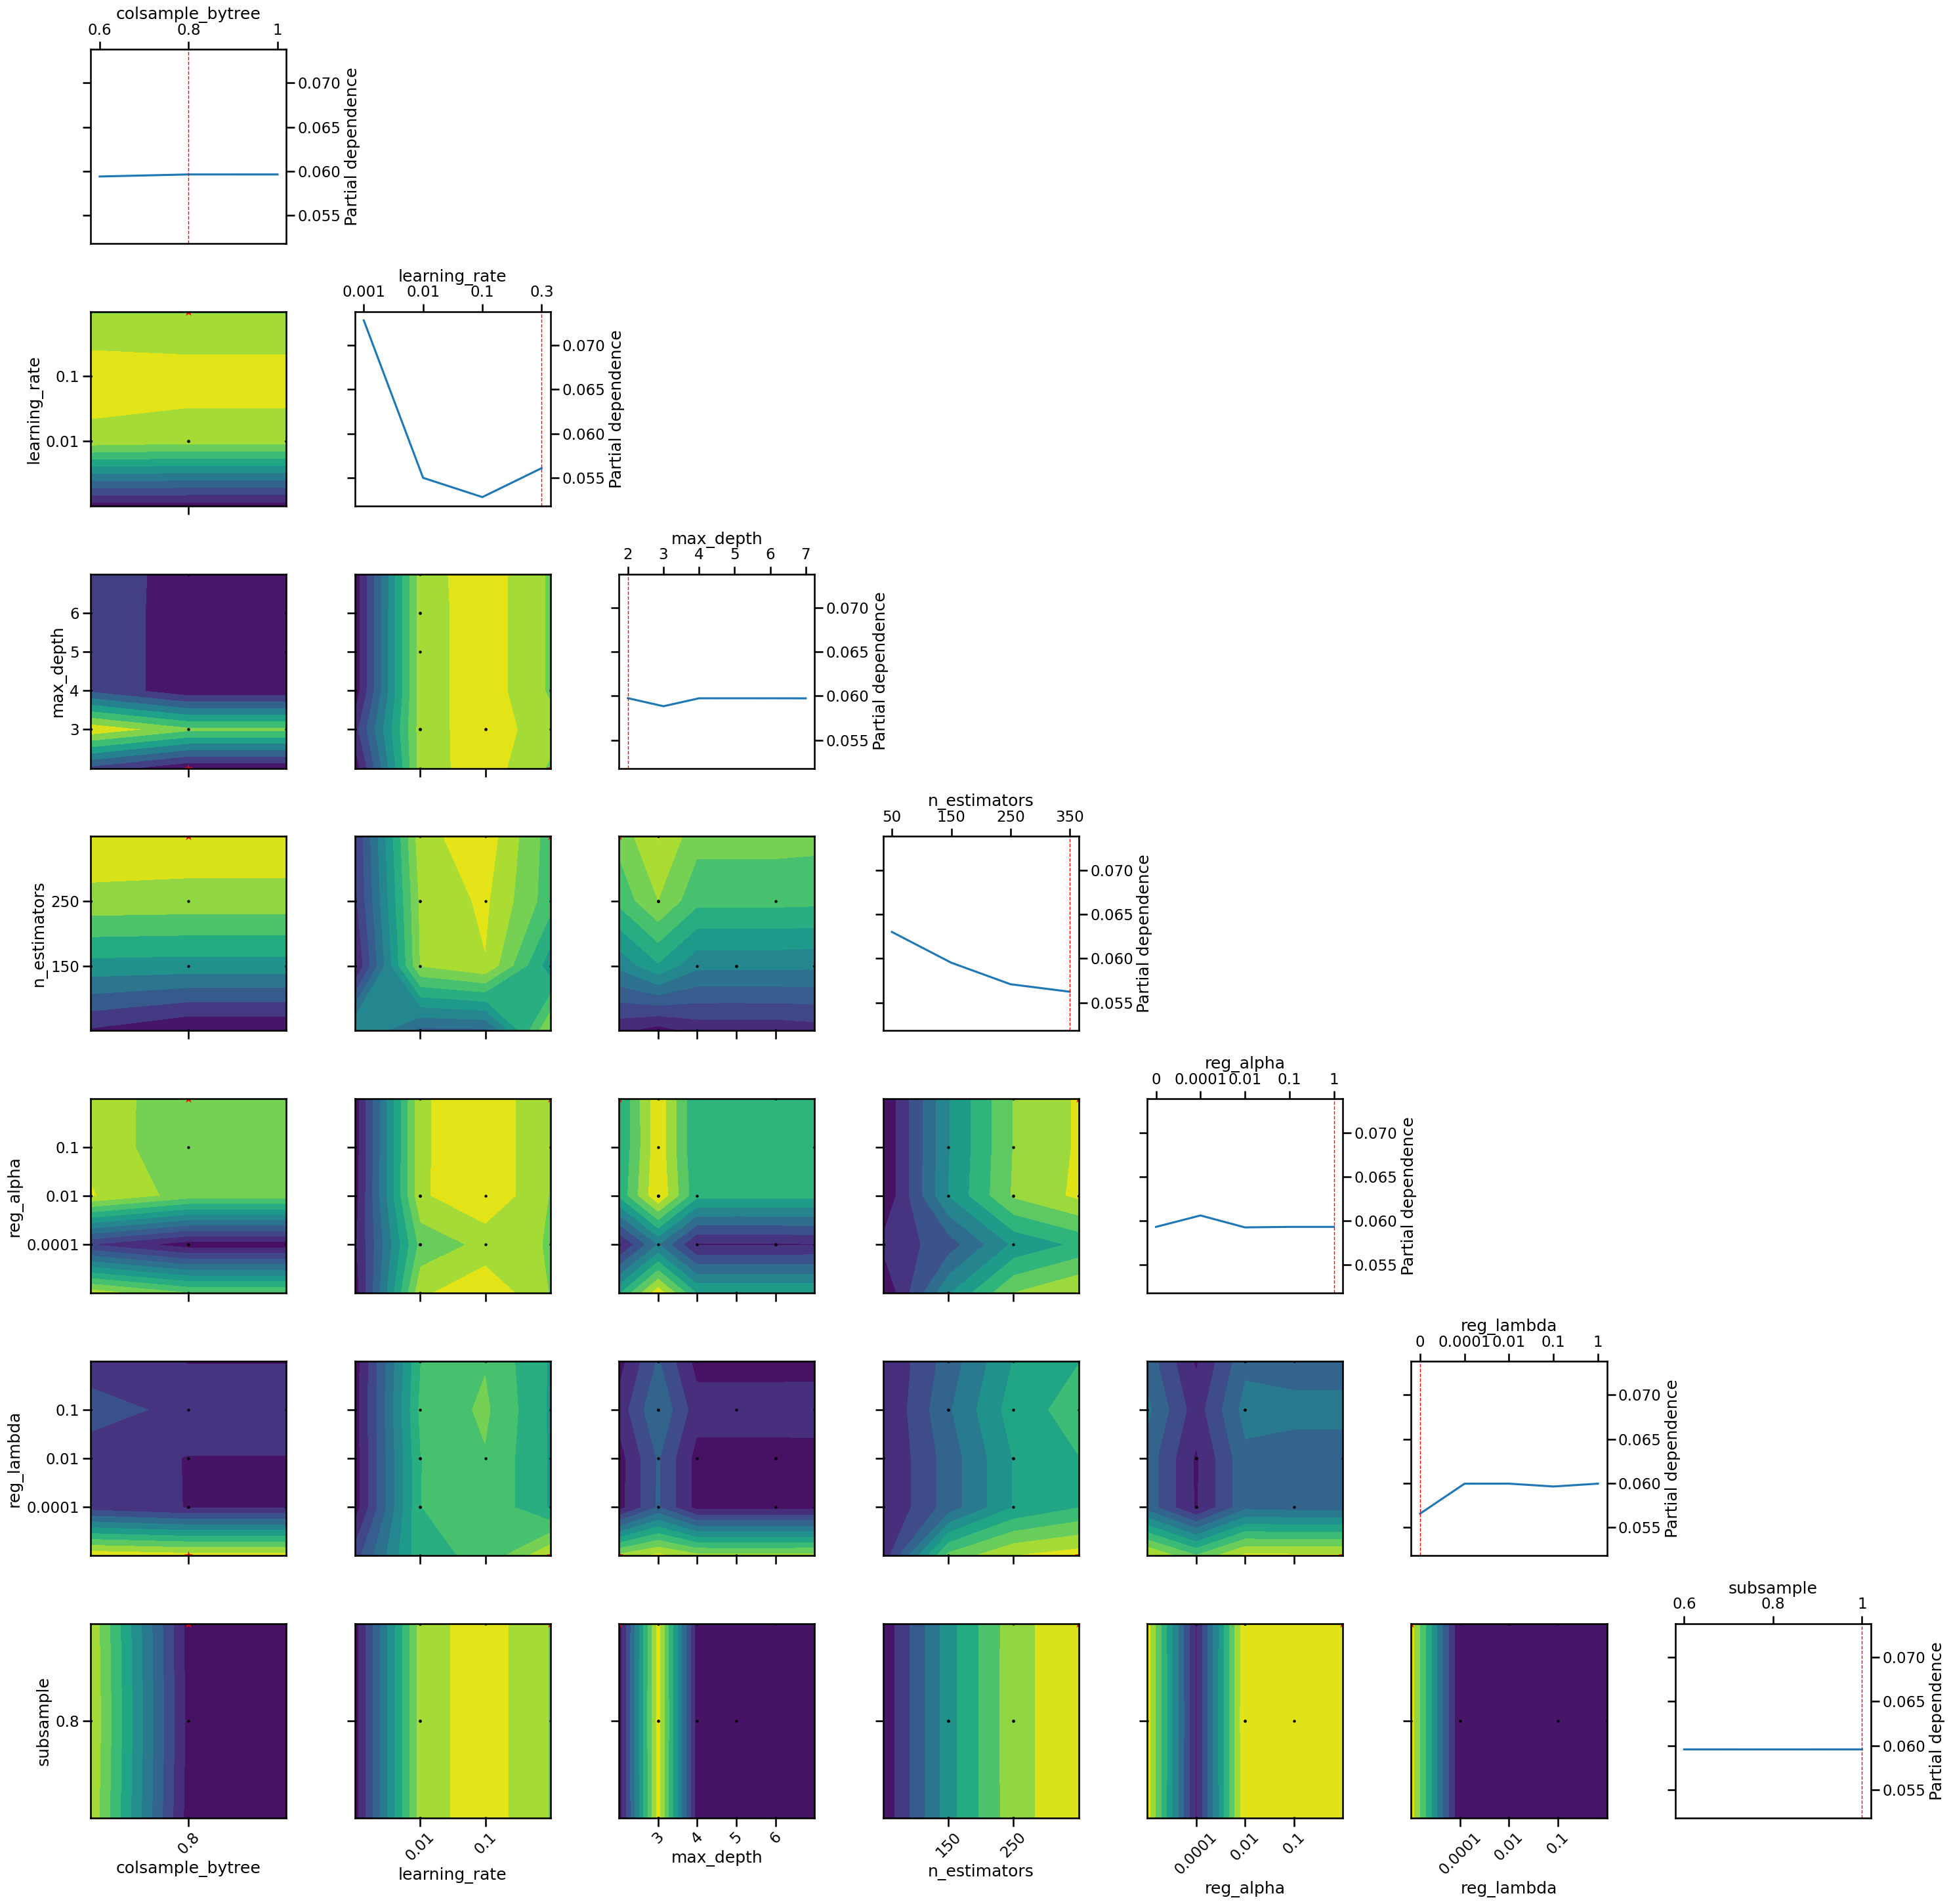


Train Metrics: {'mse': 0.006976333446243305, 'mae': 0.05644034514844158, 'r2': 0.5740593381611472, 'pearson_corr': 0.9022163107774069, 'connectome_corr': 0.8272777691680567, 'connectome_r2': 0.5487312463710811, 'geodesic_distance': 8.29435265113048}
Test Metrics: {'mse': 0.04043714597137789, 'mae': 0.1576666712819076, 'r2': -1.3822427150063188, 'pearson_corr': 0.762692598945218, 'connectome_corr': 0.6151885864961185, 'connectome_r2': -2.161292680368764, 'geodesic_distance': 9.436124762148006}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_d

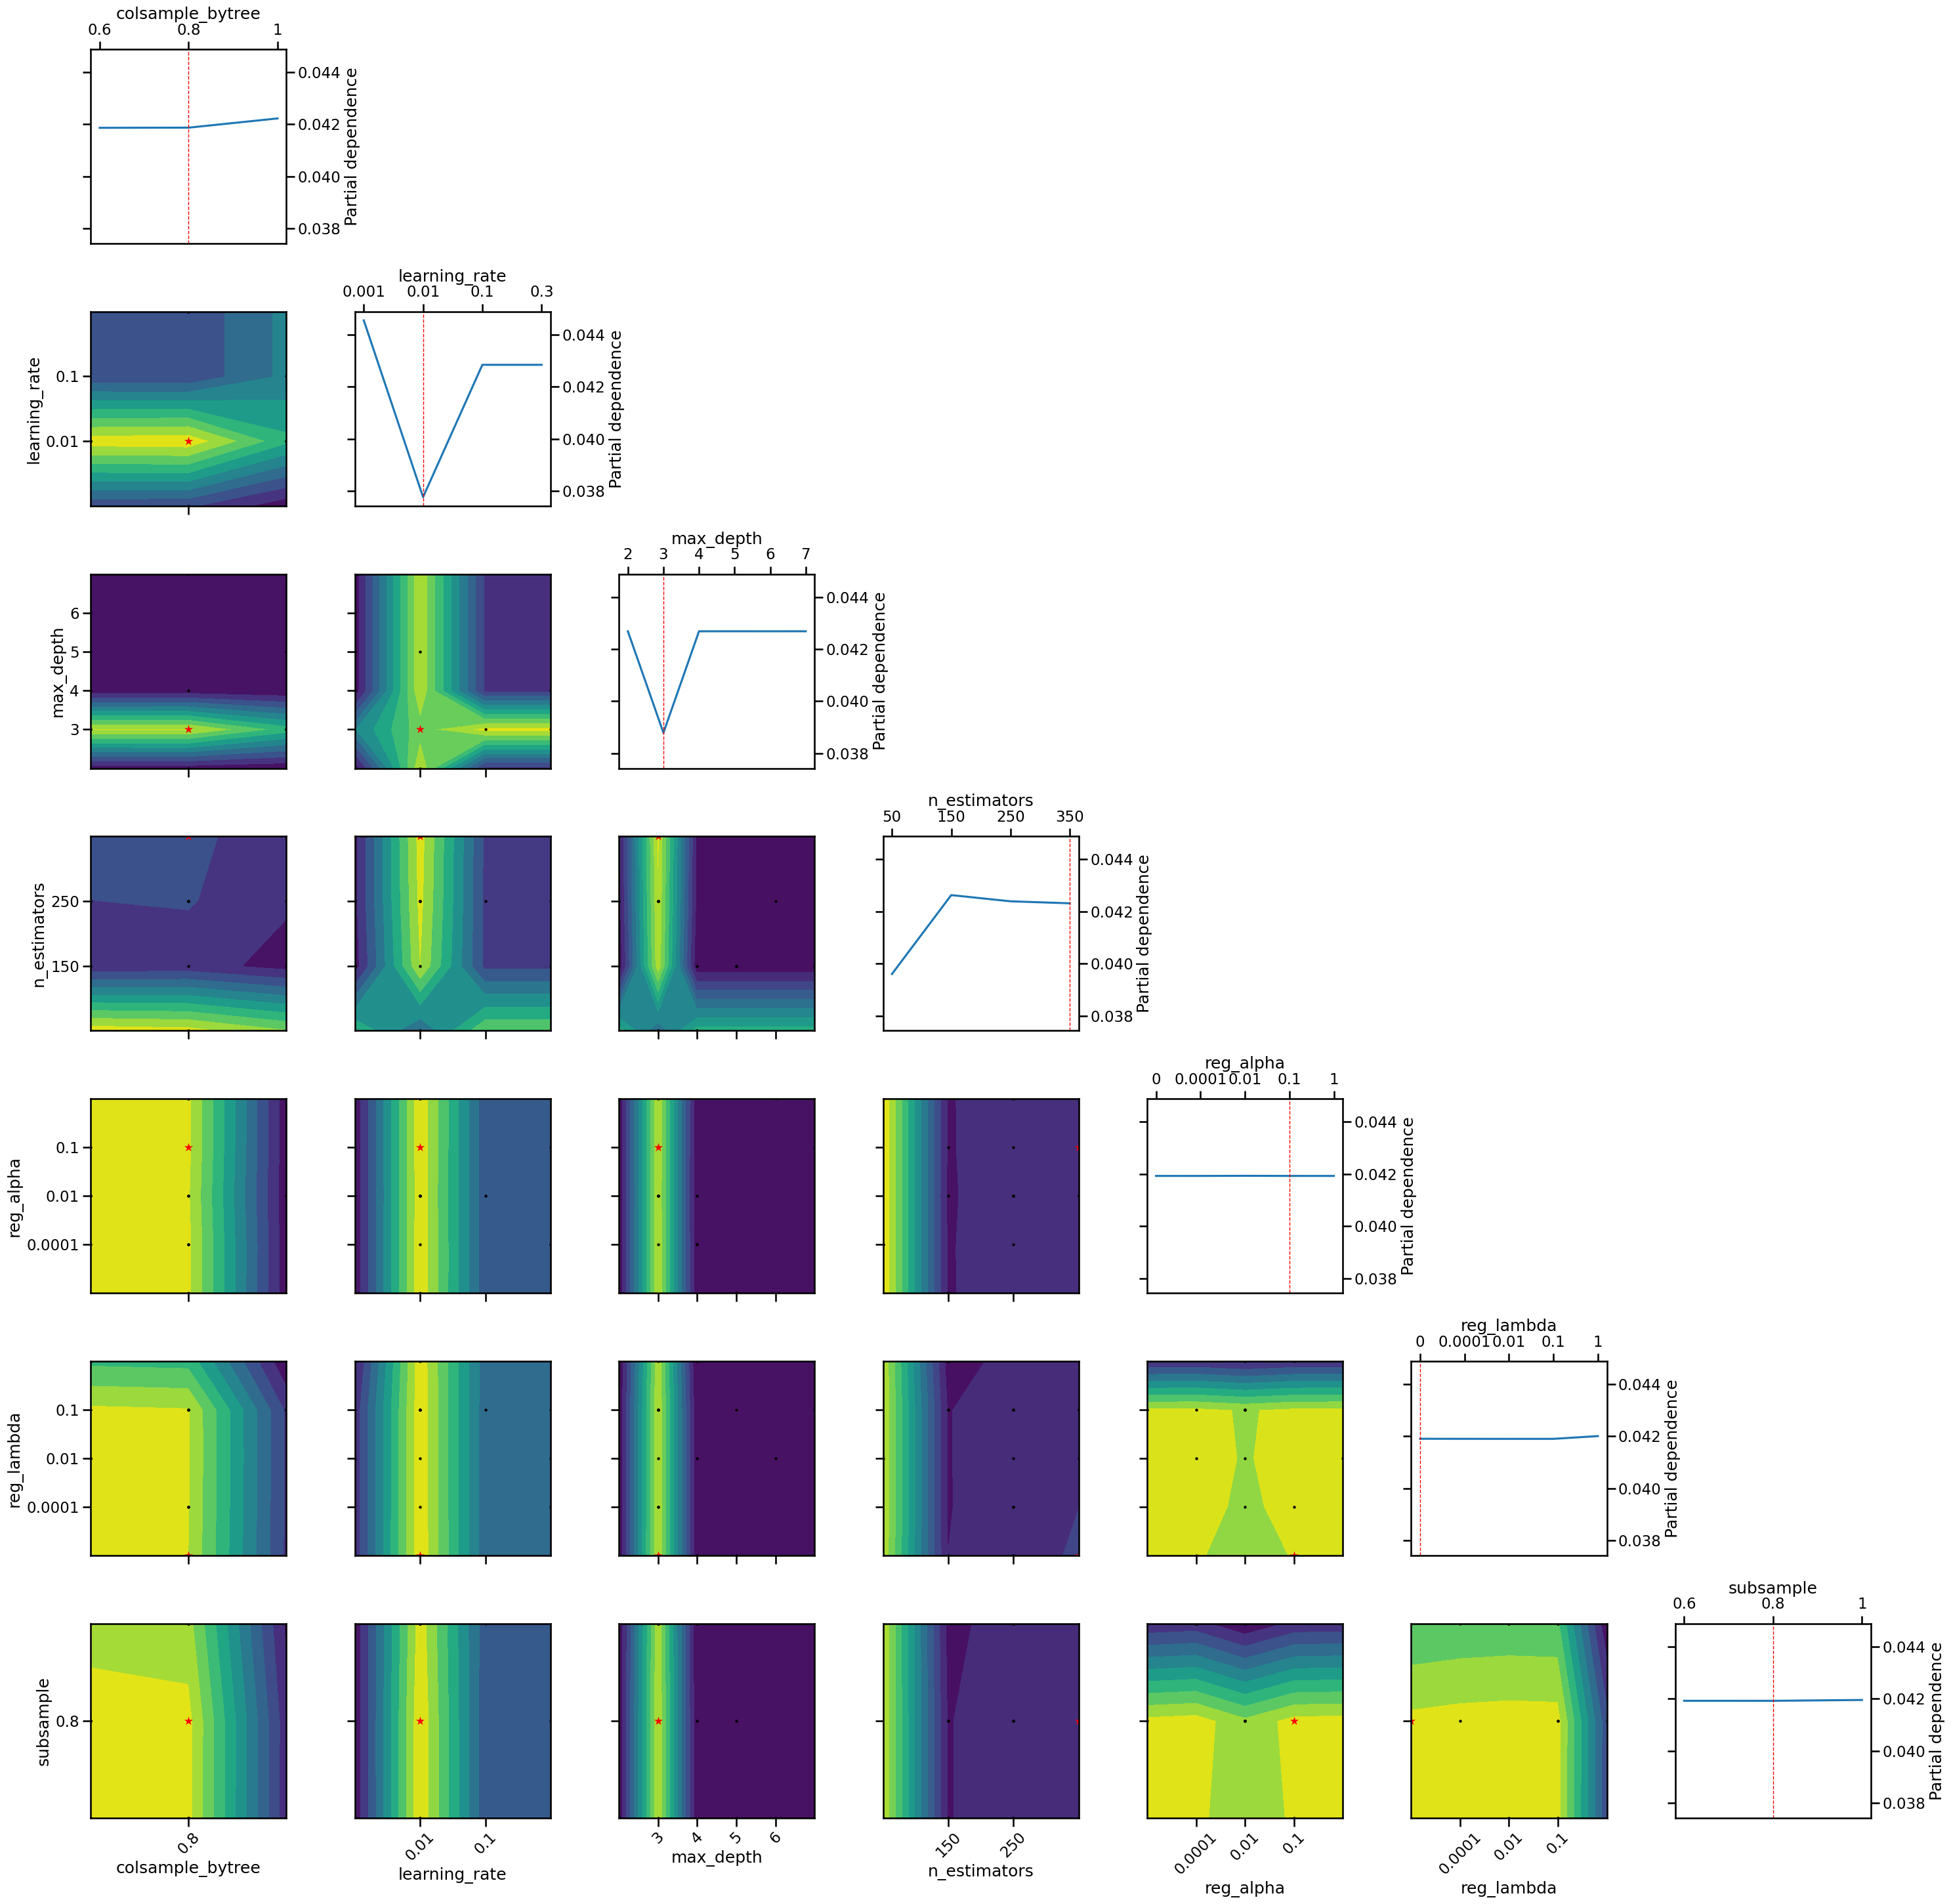


Train Metrics: {'mse': 0.012329054276747433, 'mae': 0.07616615753472004, 'r2': 0.47312683439083814, 'pearson_corr': 0.8424440170065102, 'connectome_corr': 0.7478090331164136, 'connectome_r2': 0.42216011676096343, 'geodesic_distance': 7.687999756824163}
Test Metrics: {'mse': 0.026497277246856896, 'mae': 0.13042355881457596, 'r2': -3.6879394655101394, 'pearson_corr': 0.6042254220028273, 'connectome_corr': 0.4374676245391455, 'connectome_r2': -4.2221942664406695, 'geodesic_distance': 6.029991674104676}
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None

In [17]:
trans_to_func_xgboost_sim_results = single_sim_run(
                        cv_type='community',
                        model_type='xgboost',
                        feature_type=['transcriptome'],
                        connectome_target='FC',
                        use_gpu=True,
                        use_shared_regions=False,
                        test_shared_regions=False,
                        save_sim=True,
                        resolution=1.01,
                        random_seed=42,
                        search_method=('bayes', 'mse')
                        )

### Transcriptome PCA kronecker + additional features

Number of components explaining 95.0% of the variance: 34
self.Y_sc [[ 0.      8.274   9.3887 ...  0.      4.804   4.9657]
 [ 8.274   0.     10.397  ...  0.      0.      4.2923]
 [ 9.3887 10.397   0.     ...  2.2859  0.      4.2418]
 ...
 [ 0.      0.      2.2859 ...  0.     10.888   9.2242]
 [ 4.804   0.      0.     ... 10.888   0.      9.2048]
 [ 4.9657  4.2923  4.2418 ...  9.2242  9.2048  0.    ]]
self X shape (114, 34)
summary measure kronecker
PC dim 34
Processing fold 0...
Fold 0 shapes - X_train: (7140, 1156), X_test: (812, 1156), Y_train: (7140,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_train: (7140, 1156), X_test: (812, 1156), Y_train: (7140,), Y_test: (812,)
Processing fold 2...
Fold 2 shapes - X_train: (7310, 1156), X_test: (756, 1156), Y_train: (7310,), Y_test: (756,)
Processing fold 3...
Fold 3 shapes - X_train: (7310, 1156), X_test: (756, 1156), Y_train: (7310,), Y_test: (756,)

 Test fold num: 1
(7140, 1156) (7140,) (812, 1156) (812,)
2
3
4
Processing fold 

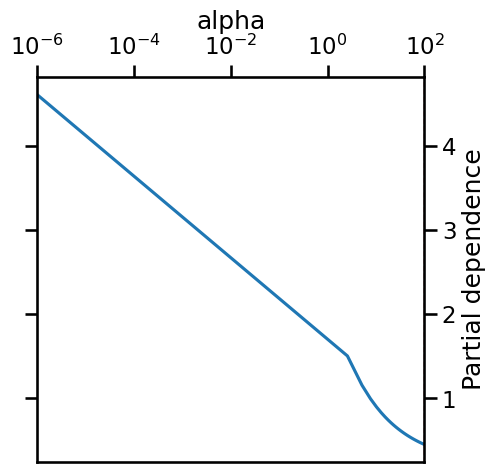


Train Metrics: {'mse': 0.016408226149000768, 'mae': 0.09693619108553203, 'r2': -2.042222538216797, 'pearson_corr': 0.7357106932272083, 'connectome_corr': 0.6454036255202632, 'connectome_r2': -2.2187271452446904, 'geodesic_distance': 9.384263767126363}
Test Metrics: {'mse': 0.05287042894585237, 'mae': 0.17595293834986847, 'r2': -11.96348067813726, 'pearson_corr': 0.19588917045248785, 'connectome_corr': 0.1302912301234239, 'connectome_r2': -14.04712025654305, 'geodesic_distance': 7.768060795941001}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 2.7%
RAM Usage: 5.5%
Available RAM: 356.2G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------

 Test fold num: 2
(7140, 1156) (7140,) (812, 1156) (812,)
1
3
4
Processing fold 0...
Fold 0 shapes - X_train: (3080, 1156), X_test: (812, 1156), Y_train: (3080,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_tra

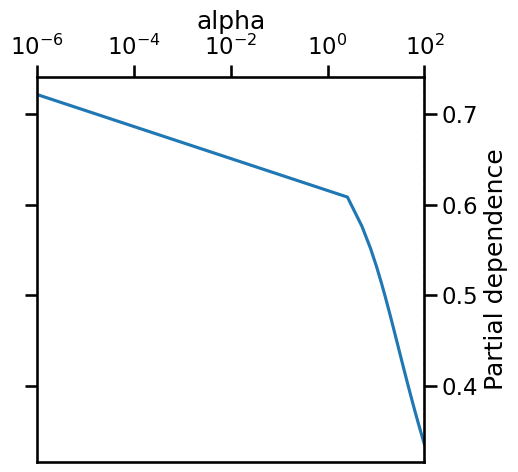


Train Metrics: {'mse': 0.015448373884232572, 'mae': 0.09176956226671862, 'r2': -1.0938842276944896, 'pearson_corr': 0.7187247920080941, 'connectome_corr': 0.6702143462032842, 'connectome_r2': -1.2022134411233216, 'geodesic_distance': 9.13313209498156}
Test Metrics: {'mse': 0.05747032014639485, 'mae': 0.1636016893678515, 'r2': -76.46338015444222, 'pearson_corr': 0.327586730510574, 'connectome_corr': 0.29098229796695757, 'connectome_r2': -89.15905315053423, 'geodesic_distance': 10.526760266839803}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 3.3%
RAM Usage: 5.4%
Available RAM: 356.4G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------

 Test fold num: 3
(7310, 1156) (7310,) (756, 1156) (756,)
1
2
4
Processing fold 0...
Fold 0 shapes - X_train: (3192, 1156), X_test: (812, 1156), Y_train: (3192,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_trai

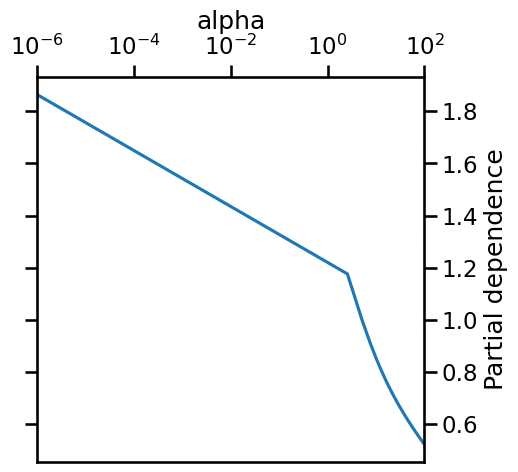


Train Metrics: {'mse': 0.0143837233105388, 'mae': 0.09008897552130546, 'r2': -1.9328284212461126, 'pearson_corr': 0.761244810433646, 'connectome_corr': 0.6797819421796387, 'connectome_r2': -2.0909021383274617, 'geodesic_distance': 9.818748598728542}
Test Metrics: {'mse': 0.04796617353703664, 'mae': 0.16244165335677624, 'r2': -2.1907576424144444, 'pearson_corr': 0.2869332610092983, 'connectome_corr': 0.22363646351564276, 'connectome_r2': -3.1639035847584593, 'geodesic_distance': 7.338227351594684}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 2.7%
RAM Usage: 5.5%
Available RAM: 356.2G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------

 Test fold num: 4
(7310, 1156) (7310,) (756, 1156) (756,)
1
2
3
Processing fold 0...
Fold 0 shapes - X_train: (3192, 1156), X_test: (812, 1156), Y_train: (3192,), Y_test: (812,)
Processing fold 1...
Fold 1 shapes - X_tra

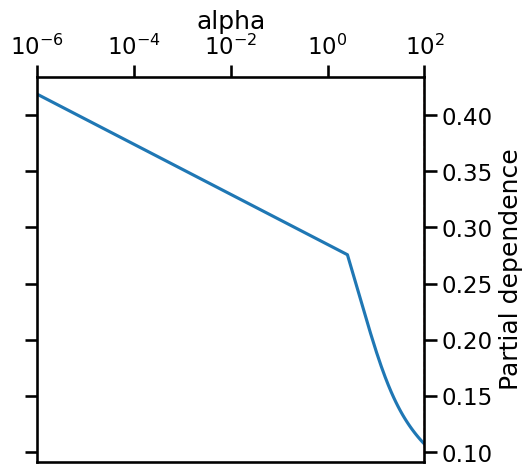


Train Metrics: {'mse': 0.016054630349966275, 'mae': 0.09392511928686577, 'r2': -0.74031217447963, 'pearson_corr': 0.7268131475953713, 'connectome_corr': 0.6361685674666548, 'connectome_r2': -0.8596565992974071, 'geodesic_distance': 10.58482605551068}
Test Metrics: {'mse': 0.6180642402757791, 'mae': 0.33167294281547927, 'r2': -341.9771500927782, 'pearson_corr': 0.09349861495188108, 'connectome_corr': 0.3736095467790883, 'connectome_r2': -387.42324831628554, 'geodesic_distance': 9.13024374080444}
BEST MODEL PARAMS {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
CPU Usage: 2.7%
RAM Usage: 5.5%
Available RAM: 356.2G
Total RAM: 376.8G
| ID | GPU | MEM |
------------------


In [5]:
transPCAkron_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='ridge',
                                              feature_type=['transcriptomePCA'], # if you want to use transcriptomePCA with kronecker, you must start with transcriptomePCA in the feature_type list
                                              summary_measure='kronecker',
                                              use_gpu=False,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method=('bayes', 'mse')
                                              )

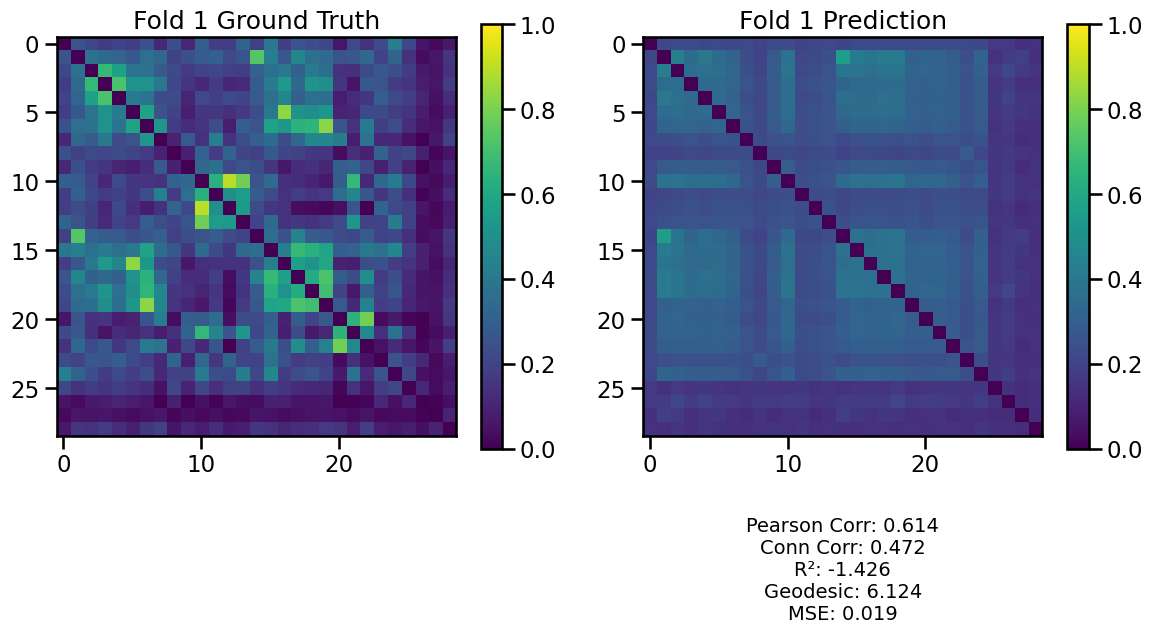

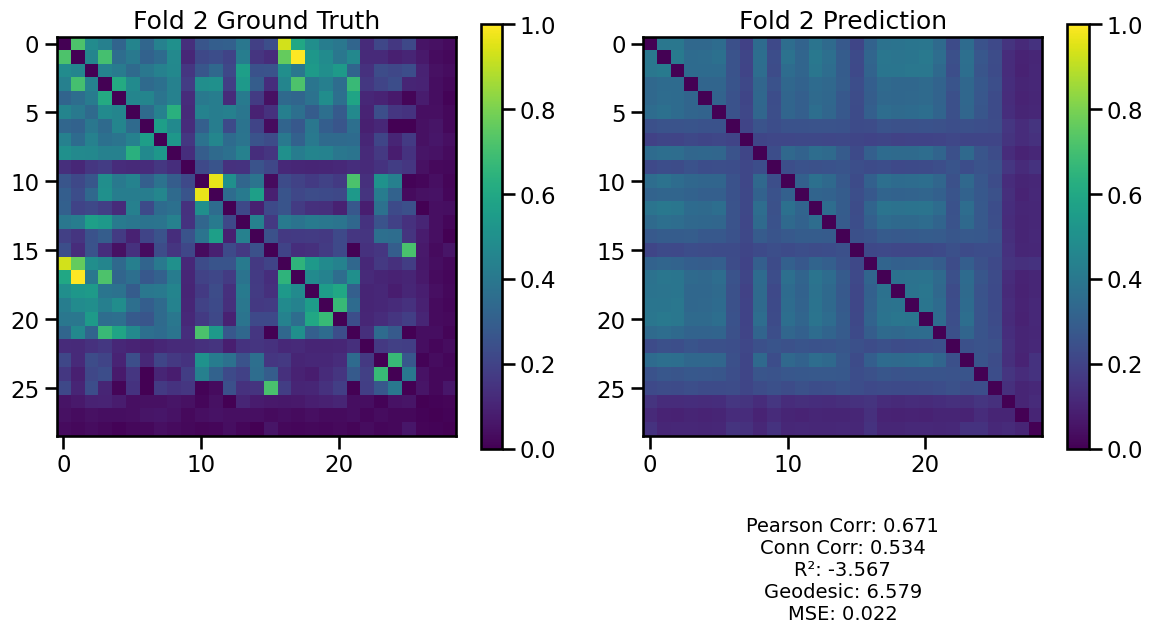

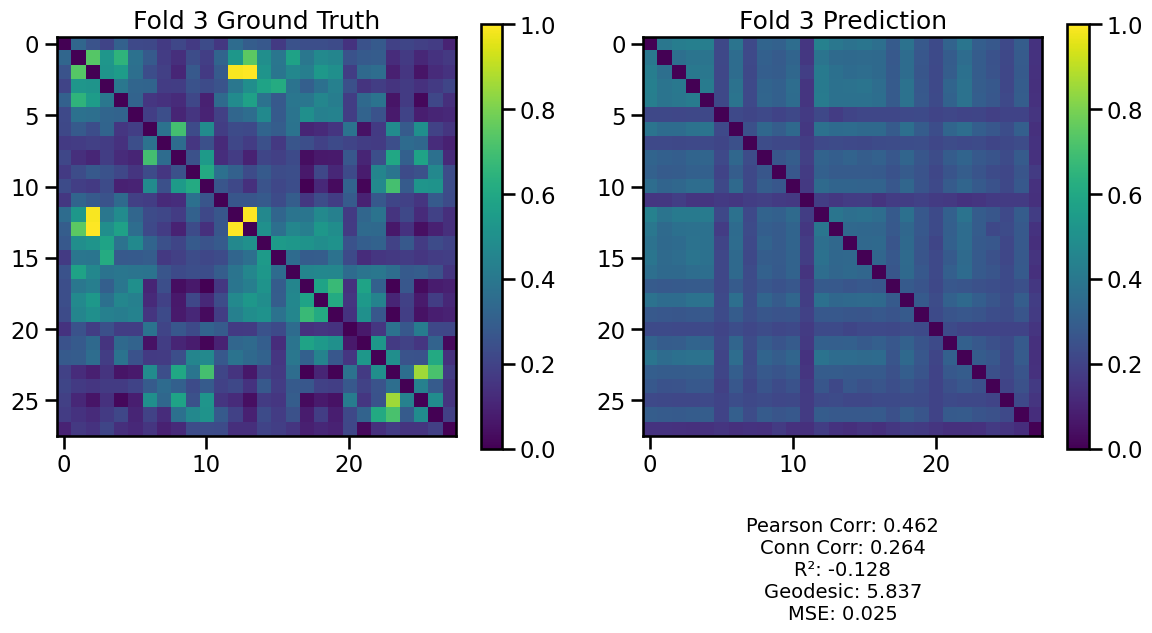

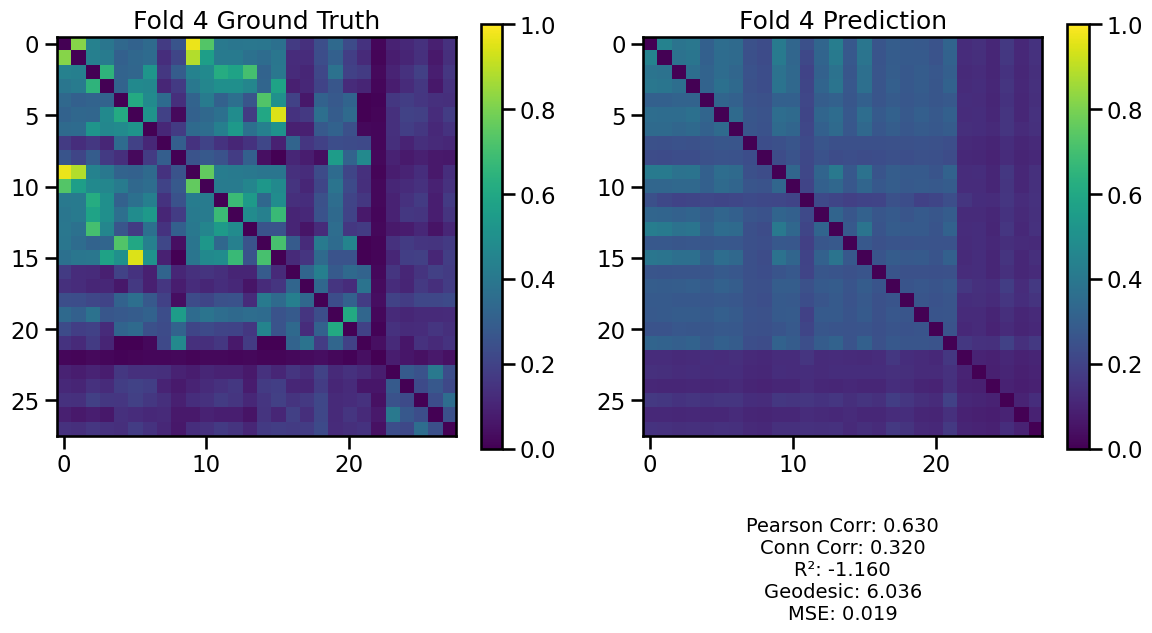

In [64]:
plot.plot_single_model_predictions_with_metrics(transPCAkron_xgb_random_nonshared_sim_results)

In [163]:
custom_xgb_random_nonshared_sim_results = single_sim_run(
                                              cv_type='random',
                                              model_type='xgboost',
                                              feature_type=['transcriptomePCA', 'structural'],
                                              summary_measure=None,
                                              use_gpu=True,
                                              use_shared_regions=False,
                                              test_shared_regions=False,
                                              save_sim=False,
                                              search_method='bayes'
                                              )

Number of components explaining 95.0% of the variance: 34
self X shape (114, 148)
Processing fold 0...
Processing fold 1...
Processing fold 2...
Processing fold 3...

 Test fold num: 1
(7140, 296) (7140,) (812, 296) (812,)
2
3
4
Processing fold 0...
Processing fold 1...
Processing fold 2...
model build init 296
ACCELERATING
{'base_estimator': 'GP', 'acq_func': 'PI'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
y_true shape: (812,)
y_pred shape: (812,)
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.378 total time=   1.6s
y_true shape: (756,)
y_pred shape: (756,)
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=4, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.01, subsample=1, tree_method=gpu_hist, verbosity=0;, score=0.175 total time=   0.3s
y_true sha

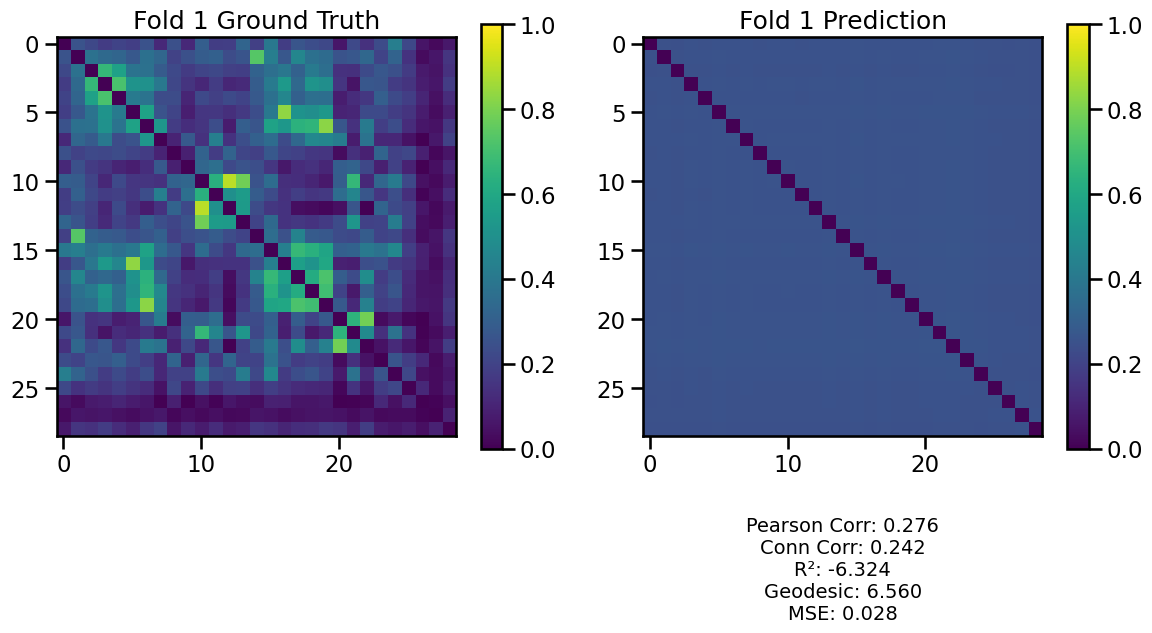

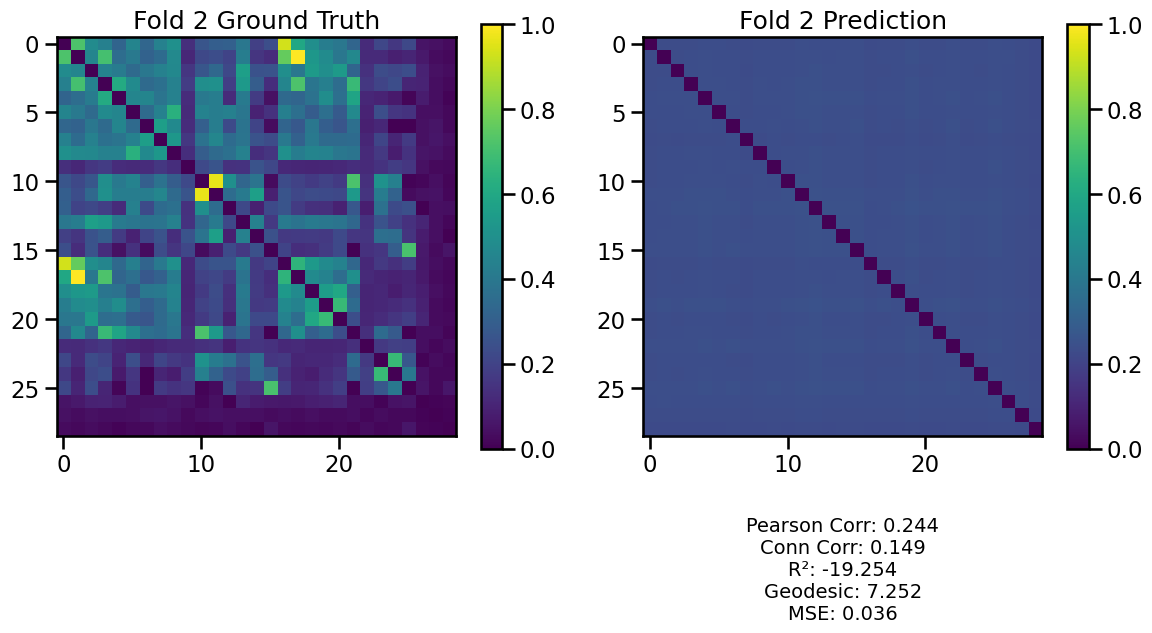

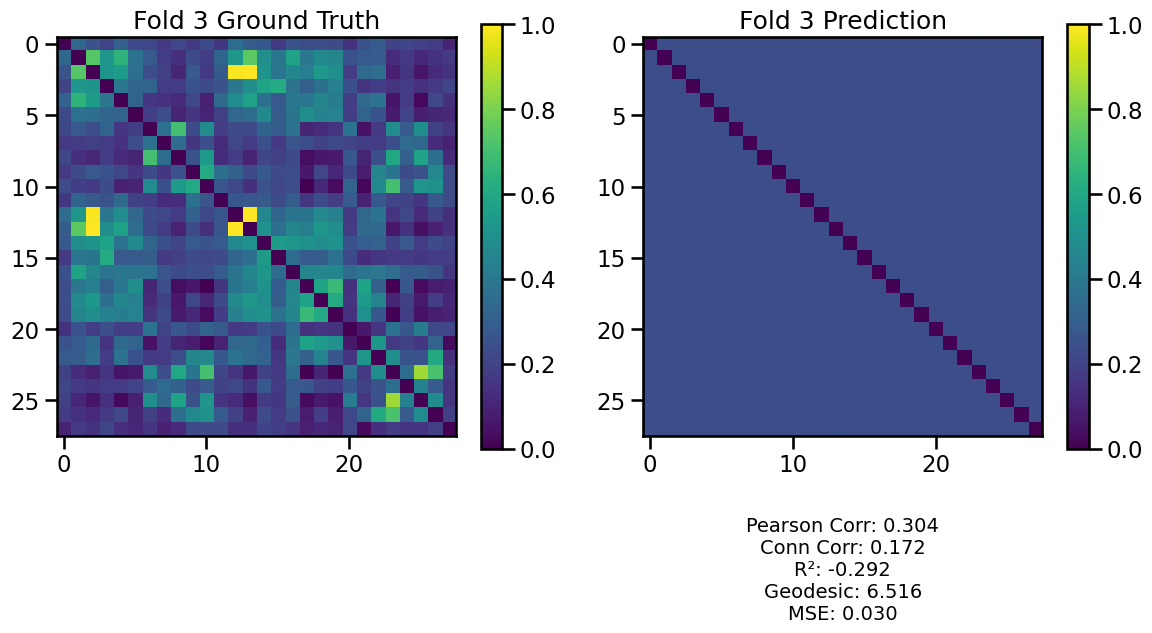

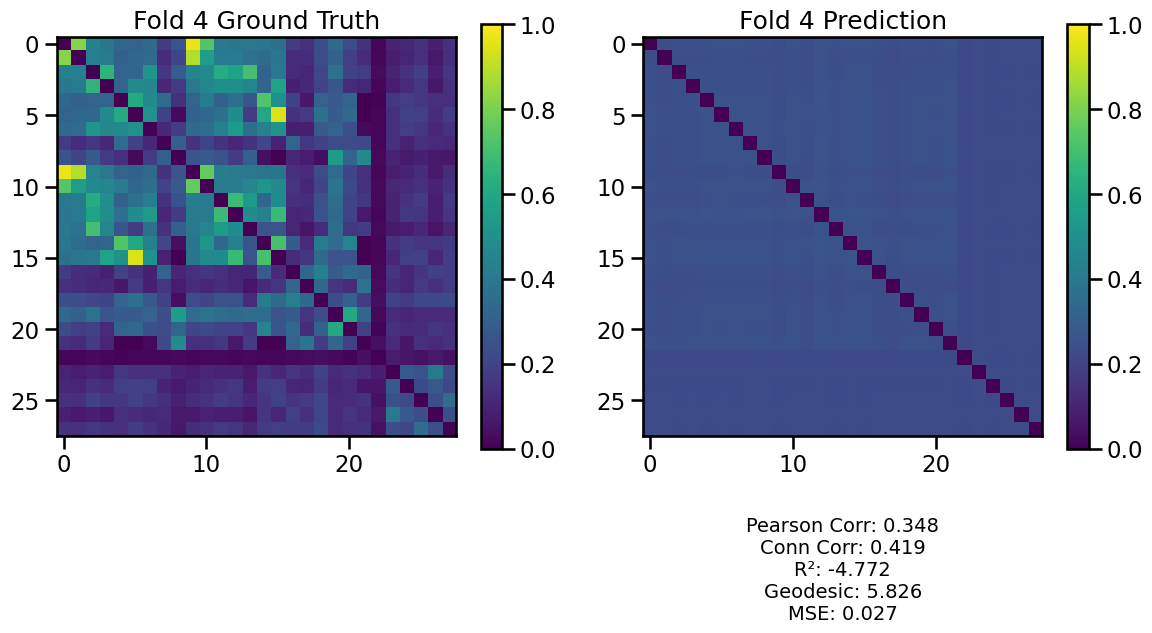

In [16]:
plot.plot_single_model_predictions_with_metrics(custom_xgb_random_nonshared_sim_results)